# <font color='red'> Description du projet </font>

## <font color='blue'>Présentation du problème </font>

L’objectif de ce projet est d’estimer **les temps de réponse et de mobilisation** de la Brigade des Pompiers de Londres. La brigade des pompiers de Londres est le service d'incendie et de sauvetage le plus actif du Royaume-Uni  et l'une des plus grandes organisations de lutte contre l'incendie et de sauvetage au monde.

Le premier jeu de données fourni contient les détails de chaque incident traité depuis janvier 2009. Des informations sont fournies sur la date et le lieu de l'incident ainsi que sur le type d'incident traité. Il est composé de deux fichiers

*   LFB Incident data from 2009 - 2017.xlsx
*   LFB Incident data from 2018 onwards.csv

Le second fichier peut-être récupéré à l'aide du lien : 'https://data.london.gov.uk/download/london-fire-brigade-incident-records/f5066d66-c7a3-415f-9629-026fbda61822/LFB%20Incident%20data%20from%202018%20onwards.csv.xlsx' pour avoir la dernière version du fichier. En effet, les données sont mises à jour tous les mois. Il faut compter au moins 7 minutes pour la lecture des données.

<br>

Le second jeu de données contient les détails de chaque camion de pompiers envoyé sur les lieux d'un incident depuis janvier 2009. Des informations sont fournies sur l'appareil mobilisé, son lieu de déploiement et les heures d'arrivée sur les lieux de l'incident. Il est composé de trois fichiers

*   LFB Mobilisation data from January 2009 - 2014.xlsx
*   LFB Mobilisation data from 2015 - 2020.xlsx
*   LFB Mobilisation data from January 2009 - 2014.xlsx

Le dernier fichier peut-être récupéré à l'aide du lien : 'https://data.london.gov.uk/download/london-fire-brigade-mobilisation-records/3ff29fb5-3935-41b2-89f1-38571059237e/LFB%20Mobilisation%20data%202021%20-%202024.xlsx' pour avoir la dernière version du fichier (mise à jour mensuelle). Il faut compter environ 17 minutes pour la lecture des données.


<br>

***Nota Bene*** *: le dernier chargement via la base de données londonienne a été fait le 12/11/2024. De nouvelles données étant régulièrement chargées sur le site, si ce notebook est exécuté, les résultats seront différents de ceux obtenus en novembre 2024 pour ce qui concerne les données `incidents`post 2018 et `mobilisations` post 2020.*

## <font color='blue'>Etapes </font>

Voici les étapes faites dans ce notebook
*   Chargement d'un environnement de travail avec les librairies nécessaires
*   Téléchargement des données définies ci-dessus
*   Première analyse des 2 dataframes incident et 3 mobilisation avant concaténation
*   Uniformisation des données des différents fichiers incident/mobilisation (même type et même nom pour les variables identiques entre chaque dataframe)
*   Concatenation des données des différents fichier incident/mobilisation
*   Description des données de chaque dataframe concaténé (incident et mobilisation) avec utilisation du template Google Sheet + création de variables
*   Jointure des données incident/mobilisation en un seul dataframe



# <font color='red'>1) Préparation de l'environement de travail </font>

## <font color='blue'>Installation des modules </font>

In [2]:
#!pip install matplotlib
#!pip install Seaborn
#!pip install openpyxl
#!pip install scipy
#!pip install geopandas
#!pip install scikit-learn
#!pip install statsmodels
#!pip install folium
#!pip install plotly
#!pip install skimpy


## <font color='blue'>Importation des bibliothèques </font>

In [3]:
import pandas as pd  # Pour les dataframe
import numpy as np # Pour le calcul numérique
import datetime as dt # Pour le calcul sur les dates

## Libraries pour les graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
import plotly.express as px  #graphique 3D dynamique

# Libraries divers
from copy import deepcopy  # gestion des copies
from pyproj import Proj, Transformer, Geod # conversion entre les coordonnées British national grid et latitude/longitude



## <font color='blue'>Liaison avec le drive (pour travailler sur GoogleColab) </font>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# <font color='red'> 2) Chargement des données </font>

## <font color='blue'> 2. a) Données sur les incidents </font>

Code pour travailler sur GoogleColab (environ 7min 30 de chargement)

In [ ]:
df_incident1 = pd.read_csv('/content/gdrive/My Drive/0_Data/LFB Incident data from 2009 - 2017.csv',low_memory=False) # chargement à partir du fichier enregistré sur le drive
url='https://data.london.gov.uk/download/london-fire-brigade-incident-records/f5066d66-c7a3-415f-9629-026fbda61822/LFB%20Incident%20data%20from%202018%20onwards.csv.xlsx'
df_incident2 = pd.read_excel(url) # chargement des données à partir du fichier correspondant à l'url

Code pour travail en local (environ 13min30 de chargement)

In [ ]:
df_incident1 = pd.read_csv('../Data/Data0/LFB Incident data from 2009 - 2017.csv',low_memory=False)
url='https://data.london.gov.uk/download/london-fire-brigade-incident-records/f5066d66-c7a3-415f-9629-026fbda61822/LFB%20Incident%20data%20from%202018%20onwards.csv.xlsx'
df_incident2 = pd.read_excel(url)

## <font color='blue'> 2. b) Données sur les mobilisations </font>

Code pour travailler sur GoogleColab (environ 17min 30 de chargement)

In [ ]:
df_mobilisation1 = pd.read_excel("/content/gdrive/My Drive/0_Data/LFB Mobilisation data from January 2009 - 2014.xlsx")
df_mobilisation2 = pd.read_excel("/content/gdrive/My Drive/0_Data/LFB Mobilisation data from 2015 - 2020.xlsx")
url='https://data.london.gov.uk/download/london-fire-brigade-mobilisation-records/3ff29fb5-3935-41b2-89f1-38571059237e/LFB%20Mobilisation%20data%202021%20-%202024.xlsx'
df_mobilisation3 = pd.read_excel(url)

Code pour travailler en local (environ 24min 30 de chargement)

In [ ]:
df_mobilisation1 = pd.read_excel("../Data/Data0/LFB Mobilisation data from January 2009 - 2014.xlsx")
df_mobilisation2 = pd.read_excel("../Data/Data0/LFB Mobilisation data from 2015 - 2020.xlsx")
url='https://data.london.gov.uk/download/london-fire-brigade-mobilisation-records/3ff29fb5-3935-41b2-89f1-38571059237e/LFB%20Mobilisation%20data%202021%20-%202024.xlsx'
df_mobilisation3 = pd.read_excel(url)

# <font color='red'> 3) Analyse des différents dataframes avant concaténation </font>

Nous avons fait une première analyse rapide des données des différents dataframe avant de les concaténer.

## <font color='blue'> 3.a) Analyse données incidents </font>

In [ ]:
display(df_incident1.shape) # 988279 entrées, 39 variables
tmp=df_incident1.isna().sum() # on récupère les données avec des na
# Affichage des variables ayant des valeurs manquantes
display(100*tmp[tmp>0]/df_incident1.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(988279, 39)

,0
SpecialServiceType,69.735166
Postcode_full,45.686896
UPRN,14.300921
USRN,16.480265
Easting_m,45.686896
Northing_m,45.686896
Latitude,45.686896
Longitude,45.686896
FirstPumpArriving_AttendanceTime,9.245466
FirstPumpArriving_DeployedFromStation,9.245972


In [ ]:
display(df_incident2.shape) # 771311 entrées, 39 variables
tmp=df_incident2.isna().sum()
# Affichage des variables ayant des valeurs manquantes
display(100*tmp[tmp>0]/df_incident2.shape[0])

(771311, 39)

,0
IncidentGroup,0.000778
SpecialServiceType,64.731217
PropertyCategory,0.000778
PropertyType,0.000778
AddressQualifier,0.000130
Postcode_full,55.242049
IncGeo_WardCode,0.062880
IncGeo_WardName,0.062880
IncGeo_WardNameNew,0.062880
Easting_m,55.242049


Dans les 2 dataframes incident, il y a beaucoup de données manquantes sur les variables

*  de localisation `Postcode_full`, `Easting_m`/`Northing_m` et `Latitude`/`Longitude`.
*  sur le second camion arrivé sur scène (logique s'il y a un seul camion déployé sur l'incident)
*  le type d'incident `SpecialServiceType` (type détaillé dans le cas "Special service")

## <font color='blue'> 3.b) Analyse données mobilisations </font>

In [ ]:
display(df_mobilisation1.shape) # 901788 entrées, 22 variables
tmp=df_mobilisation1.isna().sum()
# Affichage des variables ayant des valeurs manquantes
display(100*tmp[tmp>0]/df_mobilisation1.shape[0])

(901788, 22)

,0
DateAndTimeMobile,2.002688
TurnoutTimeSeconds,2.012890
TravelTimeSeconds,2.013444
DateAndTimeLeft,5.008162
DateAndTimeReturned,2.701078
DeployedFromStation_Code,0.000222
DeployedFromStation_Name,0.000222
DeployedFromLocation,0.004879
DelayCodeId,74.684294
DelayCode_Description,74.684294


In [ ]:
display(df_mobilisation2.shape) # 883641 entrées, 22 variables
tmp=df_mobilisation2.isna().sum()
display(100*tmp[tmp>0]/df_mobilisation2.shape[0])

(883641, 22)

,0
DateAndTimeMobile,0.823411
TurnoutTimeSeconds,0.826354
TravelTimeSeconds,0.835973
DateAndTimeLeft,0.115545
DateAndTimeReturned,89.166641
DeployedFromStation_Code,0.002377
DeployedFromStation_Name,0.002377
DeployedFromLocation,0.077407
DelayCodeId,75.583863
DelayCode_Description,75.583863


In [ ]:
display(df_mobilisation3.shape) # 676754 entrées, 22 variables
tmp=df_mobilisation3.isna().sum()
# Affichage des variables ayant des valeurs manquantes
display(100*tmp[tmp>0]/df_mobilisation3.shape[0])

(676754, 24)

,0
BoroughName,0.378276
WardName,0.472550
DateAndTimeMobile,0.439155
TurnoutTimeSeconds,0.441963
TravelTimeSeconds,0.442258
DateAndTimeLeft,0.038714
DateAndTimeReturned,100.000000
DeployedFromStation_Code,0.000591
DeployedFromStation_Name,0.000591
DeployedFromLocation,0.068415


Au vu du nombre de valeurs manquantes sur la date de retour (`DateAndTimeReturned`) dans `df_mobilisation2` et `df_mobilisation3`, cette variable n'est visiblement plus reportée depuis une dizaine d'année.

Les deux autres variables avec beaucoup de valeurs manquantes `DelayCodeId` et `DelayCode_Description` ne sont renseignées que dans les cas où il y a un retard dans le temps de réaction liée à un problème quelconque (comme des embouteillages).

# <font color='red'> 4) Concaténation des données les incidents et les mobilisations </font>

Avant de concaténer les 2 dataframes incident et les 3 dataframes mobilisation, il faut vérifier qu'il n'y a pas eu de changement dans la structure des données au cours du temps.

## <font color='blue'> 4.a) Création de méthodes pour comparer les différents dataframes incident/mobilisation </font>

In [ ]:
# Cette première méthode permet de comparer les noms des colonnes de 2 dataframes
def comparer_nom_colonnes(df1, df2):
    """
    Compare les noms des colonnes communes entre deux DataFrames.

    Paramètres :
    df1 (pd.DataFrame) : Premier DataFrame
    df2 (pd.DataFrame) : Deuxième DataFrame

    Retourne :
    La différence des noms de colonnes de deux DataFrame
    """
    # Convertir les colonnes en sets pour comparaison
    colonnes_df1 = set(df1.columns)
    colonnes_df2 = set(df2.columns)

    # Vérifier si les colonnes sont identiques
    if colonnes_df1 == colonnes_df2:
        print("Les noms de colonnes des deux DataFrames sont identiques.")
    else:
        # Colonnes présentes dans df1 mais pas dans df2
        colonnes_dans_df1_pas_df2 = colonnes_df1 - colonnes_df2
        # Colonnes présentes dans df2 mais pas dans df1
        colonnes_dans_df2_pas_df1 = colonnes_df2 - colonnes_df1

        print("Les noms de colonnes des deux DataFrames sont différentes.")

        if colonnes_dans_df1_pas_df2:
            print("Colonnes présentes dans df1 mais pas dans df2 :", colonnes_dans_df1_pas_df2)

        if colonnes_dans_df2_pas_df1:
            print("Colonnes présentes dans df2 mais pas dans df1 :", colonnes_dans_df2_pas_df1)

In [ ]:
# Cette méthode permet d'afficher les colonnes avec des types de format différents
def colonnes_avec_dtypes_diff(df1, df2):
    """
    Compare les types de données des colonnes communes entre deux DataFrames.

    Paramètres :
    df1 (pd.DataFrame) : Premier DataFrame
    df2 (pd.DataFrame) : Deuxième DataFrame

    Retourne :
    colonnes_diff  : Liste des colonnes avec des types de données différents
    """
    # Trouver les colonnes communes
    common_columns = df1.columns.intersection(df2.columns)

    # Comparer les types de données des colonnes communes
    dtypes_diff = df1[common_columns].dtypes != df2[common_columns].dtypes

    # Extraire les colonnes avec des types de données différents
    colonnes_avec_dtypes_diff = common_columns[dtypes_diff]

    # Convertir l'Index en liste et retourner
    res = [(col, df1[col].dtype, df2[col].dtype) for col in colonnes_avec_dtypes_diff]
    colonnes_diff = pd.DataFrame(res, columns=['Colonne', 'Type dans data 1', 'Type dans data 2'])
    return colonnes_diff

## <font color='blue'> 4.b) Concaténation des dataframe `df_incident1` et `df_incident2` </font>

### 4.b.i) Vérification si les dataframes sont concaténables

In [ ]:
# est-ce que les tables sur les incidents sont concaténables ?
# est-ce qu'il y a le même nombre de variables ? OUI
display(df_incident1.shape) # 988279 entrées, 39 variables
display(df_incident2.shape) # 771311 entrées, 39 variables
print('\n')

print('Est-ce que le nom des colonnes est identique ?')
comparer_nom_colonnes(df_incident1, df_incident2)
print('\n')

print('Est-ce que les variables sont de même type dans les 2 dataframes ?')
print ('Il y a ', sum(df_incident1.dtypes==df_incident2.dtypes), ' variables sur ', df_incident1.shape[1], 'avec le même type')
print('\n')

print('Les variables suivantes ont un type différent')
print('data 1=df_incident1 et data2=df_incident2')
print(colonnes_avec_dtypes_diff(df_incident1, df_incident2))


(988279, 39)

(771311, 39)



Est-ce que le nom des colonnes est identique ?
Les noms de colonnes des deux DataFrames sont identiques.


Est-ce que les variables sont de même type dans les 2 dataframes ?
Il y a  36  variables sur  39 avec le même type


Les variables suivantes ont un type différent
data 1=df_incident1 et data2=df_incident2
      Colonne Type dans data 1 Type dans data 2
0  DateOfCall           object   datetime64[ns]
1        UPRN          float64            int64
2        USRN          float64            int64


Il y a 3 variables dont le format est à modifier :
*   "`DateOfCall`" -> format `object` dans `df_incident1` et format `datetime64` dans `df_incident2`
*   "`UPRN`" et "`USRN`" -> format `float` dans `df_incident1` et format `int` dans `df_incident2`

### 4.b.ii) Modifications nécessaires à la concaténation

In [ ]:
# avant de concaténer, on change les types
# DateOfCall dans df_incident1
df_incident1.DateOfCall=pd.to_datetime(df_incident1.DateOfCall, format='%d-%b-%y')

# Changement du format float en int
df_incident1[["UPRN" , "USRN"]] = df_incident1[["UPRN" , "USRN"]].astype('Int64')
df_incident2[["UPRN" , "USRN"]] = df_incident2[["UPRN" , "USRN"]].astype('Int64')

# on vérifie que tous les types sont maintenant identiques
print ('Il y a maintenant ', sum(df_incident1.dtypes==df_incident2.dtypes), ' variables sur ', df_incident1.shape[1], 'avec le même type')
print('\n')
print('Les variables suivantes ont un type différent')
print(colonnes_avec_dtypes_diff(df_incident1, df_incident2))

Il y a maintenant  39  variables sur  39 avec le même type


Les variables suivantes ont un type différent
Empty DataFrame
Columns: [Colonne, Type dans data 1, Type dans data 2]
Index: []


Affichage du type des variables maintenant que c'est le même pour toutes

In [ ]:
df_incident1.dtypes

,0
IncidentNumber,object
DateOfCall,datetime64[ns]
CalYear,int64
TimeOfCall,object
HourOfCall,int64
IncidentGroup,object
StopCodeDescription,object
SpecialServiceType,object
PropertyCategory,object
PropertyType,object


### 4.b.iii) Uniformation de la variable `IncidentNumber`

Le numéro d'incident `IncidentNumber` sera utilisé pour la jointure entre les dataframes `incident` et `mobilisation`. Dans l'objectif d'uniformiser cette variable, nous allons la transformer en integer (`type=object` dans les 2 dataframes)

In [ ]:
# on regarde déjà à quoi ressemble IncidentNumber dans chaque dataframe
display(df_incident1['IncidentNumber'].head(5)) # les premiers elements dans df_incident1 ressemble à un format float
display(df_incident1['IncidentNumber'].tail(5)) # les derniers éléments sont des séries de chiffres séparées par un tiret
display(df_incident2['IncidentNumber'].head(5)) # même format que la fin de df_incident1 (série de chiffres séparées par un tiret)
display(df_incident2['IncidentNumber'].tail(5))

,IncidentNumber
0,235138081.00
1,1091.00
2,2091.00
3,3091.00
4,5091.00


,IncidentNumber
988274,175190-31122017
988275,175193-31122017
988276,175194-31122017
988277,175195-31122017
988278,175197-31122017


,IncidentNumber
0,000008-01012018
1,000009-01012018
2,000010-01012018
3,000011-01012018
4,000014-01012018


,IncidentNumber
771306,166233-30092024
771307,166234-30092024
771308,166235-30092024
771309,166238-30092024
771310,166241-30092024


**Création de la variable `IncidentNumber_int`**

In [ ]:
# avant de changer le type pour integer, il faut transformer en numérique car les premiers cas sont semblables à des float
col_index = df_incident1.columns.get_loc('IncidentNumber')
df_incident1.insert(col_index + 1, 'IncidentNumber_int', pd.to_numeric(df_incident1["IncidentNumber"].str.replace('-', '')).astype(int))


# Incident Number dans inc2
col_index = df_incident2.columns.get_loc('IncidentNumber')
df_incident2.insert(col_index + 1, 'IncidentNumber_int', df_incident2["IncidentNumber"].str.replace('-', '').astype(int))


In [ ]:
# on vérifie le contenu de la variable IncidentNumber_int
display(df_incident1['IncidentNumber_int'].head(5))
display(df_incident1['IncidentNumber_int'].tail(5))
display(df_incident2['IncidentNumber_int'].head(5))
display(df_incident2['IncidentNumber_int'].tail(5))

,IncidentNumber_int
0,235138081
1,1091
2,2091
3,3091
4,5091


,IncidentNumber_int
988274,17519031122017
988275,17519331122017
988276,17519431122017
988277,17519531122017
988278,17519731122017


,IncidentNumber_int
0,801012018
1,901012018
2,1001012018
3,1101012018
4,1401012018


,IncidentNumber_int
771306,16623330092024
771307,16623430092024
771308,16623530092024
771309,16623830092024
771310,16624130092024


Vérification que les modifications n'ont pas eu d'impact sur `IncidentNumber_int` :
- même nombre de valeurs avant/après modification
- pas de nouvelles valeurs

In [ ]:

print('meme nb de valeurs unique avant/apres modif df_incident1:', df_incident1["IncidentNumber_int"].unique().shape==df_incident1["IncidentNumber"].unique().shape)
print('meme nb de valeurs unique avant/apres modif df_incident2:', df_incident2["IncidentNumber_int"].unique().shape==df_incident2["IncidentNumber"].unique().shape)
print('\n')

tmp1=list(df_incident1["IncidentNumber_int"].unique())
tmp2=list(df_incident2["IncidentNumber_int"].unique())

tmp1.sort()
tmp2.sort()

print('aucune valeur de IncidentNumber de df_incident1 dans df_incident1 (dumb case):', len(list(set(tmp1) - set(tmp1)))==len(tmp1)) # dumb case pour vérifier
print('aucune valeur de IncidentNumber de df_incident1 dans df_incident2 :', (len(list(set(tmp1) - set(tmp2)))==len(tmp1)) & (len(list(set(tmp2) - set(tmp1)))==len(tmp2)))

# suppression des variables inutiles
del tmp1, tmp2

meme nb de valeurs unique avant/apres modif df_incident1: True
meme nb de valeurs unique avant/apres modif df_incident2: True


aucune valeur de IncidentNumber de df_incident1 dans df_incident1 (dumb case): False
aucune valeur de IncidentNumber de df_incident1 dans df_incident2 : True


Suppression de la colonne `IncidentNumber` et modification du nom `IncidentNumber_int` par `IncidentNumber`

In [ ]:
# Supprimer la colonne IncidentNumber
df_incident1.drop(columns=['IncidentNumber'], inplace=True)
df_incident2.drop(columns=['IncidentNumber'], inplace=True)

# Renommer la colonne IncidentNumber_int en IncidentNumber
df_incident1.rename(columns={'IncidentNumber_int': 'IncidentNumber'}, inplace=True)
df_incident2.rename(columns={'IncidentNumber_int': 'IncidentNumber'}, inplace=True)

### 4.b.iv) Concaténation des tables df_incident1 et df_incident2

In [ ]:
df_incident=pd.concat([df_incident1, df_incident2])

## <font color='blue'> 4.c) Concaténation des dataframe `df_mobilisation1`, `df_mobilisation2` et `df_mobilisation3` </font>

### 4.c.i) Vérification si les dataframes sont concaténables

In [ ]:
# est-ce que les tables sur les mobilisations sont concaténables (mêmes nom, même type de variables)
display(df_mobilisation1.shape) # 901788 entrées, 22 variables
display(df_mobilisation2.shape) # 883641 entrées, 22 variables
display(df_mobilisation3.shape) # 676754, 24 variables
print('\n')

print('Est-ce que le nom des colonnes est identique entre df_mobilisation1 et df_mobilisation2?')
comparer_nom_colonnes(df_mobilisation1, df_mobilisation2)
print('\n')
print('Est-ce que le nom des colonnes est identique entre df_mobilisation1 (df1) et df_mobilisation3 (df2)?')
comparer_nom_colonnes(df_mobilisation1, df_mobilisation3)
print('\n')
print('Est-ce que le nom des colonnes est identique entre df_mobilisation2 (df1) et df_mobilisation3 (df2)?')
comparer_nom_colonnes(df_mobilisation2, df_mobilisation3)



(901788, 22)

(883641, 22)

(676754, 24)



Est-ce que le nom des colonnes est identique entre df_mobilisation1 et df_mobilisation2?
Les noms de colonnes des deux DataFrames sont identiques.


Est-ce que le nom des colonnes est identique entre df_mobilisation1 (df1) et df_mobilisation3 (df2)?
Les noms de colonnes des deux DataFrames sont différentes.
Colonnes présentes dans df2 mais pas dans df1 : {'WardName', 'BoroughName'}


Est-ce que le nom des colonnes est identique entre df_mobilisation2 (df1) et df_mobilisation3 (df2)?
Les noms de colonnes des deux DataFrames sont différentes.
Colonnes présentes dans df2 mais pas dans df1 : {'WardName', 'BoroughName'}


On constate que dans le fichier le plus récent (téléchargé sur le site) il y a 2 variables supplémentaires `BoroughName` et `WardName`

On choisit de supprimer ces deux variables car elles existent aussi dans le dataframe `df_incident`. On pourra donc récupérer ces informations depuis `df_incident` lors de la jointure des 2 tables.

In [ ]:
colonnes_a_supprimer_df_mobilisation3=df_mobilisation3.columns.difference(df_mobilisation1.columns)
df_mobilisation3 = df_mobilisation3.drop(columns=colonnes_a_supprimer_df_mobilisation3)

In [ ]:
# Apres la suppression de colonnes de df_mobilisation3, on vérifie si tous les data ont les mêmes colonnes et ses dtypes de variables
print('Est-ce que le nom des colonnes est identique entre df_mobilisation1 et df_mobilisation2?')
comparer_nom_colonnes(df_mobilisation1, df_mobilisation2)
print('Est-ce que le nom des colonnes est identique entre df_mobilisation1 et df_mobilisation3?')
comparer_nom_colonnes(df_mobilisation1, df_mobilisation3)
print('Est-ce que le nom des colonnes est identique entre df_mobilisation2 et df_mobilisation3?')
comparer_nom_colonnes(df_mobilisation3, df_mobilisation1)
print('\n')

# on vérifie si le type de toutes les variables est identique
print ('Il y a ', sum(df_mobilisation1.dtypes==df_mobilisation2.dtypes), ' variables sur ', df_mobilisation2.shape[1], 'avec le même type entre mobilisation1 et 2')
print('Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation2)')
print(colonnes_avec_dtypes_diff(df_mobilisation1, df_mobilisation2))
print('\n')

print ('Il y a ', sum(df_mobilisation1.dtypes==df_mobilisation3.dtypes), ' variables sur ', df_mobilisation1.shape[1], 'avec le même type entre mobilisation1 et 3')
print('Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation3)')
print(colonnes_avec_dtypes_diff(df_mobilisation1, df_mobilisation3))
print('\n')

print ('Il y a ', sum(df_mobilisation2.dtypes==df_mobilisation3.dtypes), ' variables sur ', df_mobilisation2.shape[1], 'avec le même type entre mobilisation2 et 3')
print('Les variables suivantes ont un type différent (data1=df_mobilisation2 et data2=df_mobilisation3)')
print(colonnes_avec_dtypes_diff(df_mobilisation2, df_mobilisation3))

Est-ce que le nom des colonnes est identique entre df_mobilisation1 et df_mobilisation2?
Les noms de colonnes des deux DataFrames sont identiques.
Est-ce que le nom des colonnes est identique entre df_mobilisation1 et df_mobilisation3?
Les noms de colonnes des deux DataFrames sont identiques.
Est-ce que le nom des colonnes est identique entre df_mobilisation2 et df_mobilisation3?
Les noms de colonnes des deux DataFrames sont identiques.


Il y a  21  variables sur  22 avec le même type entre mobilisation1 et 2
Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation2)
          Colonne Type dans data 1 Type dans data 2
0  IncidentNumber            int64           object


Il y a  19  variables sur  22 avec le même type entre mobilisation1 et 3
Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation3)
               Colonne Type dans data 1 Type dans data 2
0       IncidentNumber            int64           obje

### 4.c.ii) Création de la variable `IncidentNumber_int`

On regarde le format de `IncidentNumber` sur les 3 dataframes

In [ ]:
display(df_mobilisation1["IncidentNumber"].head(5)) # pour df_mobilisation1, le type est déjà integer
display(df_mobilisation2["IncidentNumber"].head(5)) # sur les premières lignes format similaire à un integer
display(df_mobilisation2["IncidentNumber"].tail(5)) # format avec un tiret
display(df_mobilisation3["IncidentNumber"].head(5)) # format avec un tiret pour tout df_mobilisation3
display(df_mobilisation3["IncidentNumber"].tail(5))

,IncidentNumber
0,235138081
1,235138081
2,2091
3,3091
4,5091


,IncidentNumber
0,1151
1,1151
2,4151
3,8151
4,10151


,IncidentNumber
883636,164506-31122020
883637,164508-31122020
883638,164509-31122020
883639,164510-31122020
883640,164510-31122020


,IncidentNumber
0,000004-01012021
1,000005-01012021
2,000006-01012021
3,000007-01012021
4,000007-01012021


,IncidentNumber
676749,165652-30092024
676750,165652-30092024
676751,165654-30092024
676752,165656-30092024
676753,165657-30092024


In [ ]:
# on crée IncidentNumber_int dans df_mobilisation1 qui est identique à IncidentNumber pour cette table uniquement
col_index = df_mobilisation1.columns.get_loc('IncidentNumber')
df_mobilisation1.insert(col_index + 1, 'IncidentNumber_int',  df_mobilisation1["IncidentNumber"])

# Création de IncidentNumber_int dans df_mobilisation3
col_index = df_mobilisation3.columns.get_loc('IncidentNumber')
df_mobilisation3.insert(col_index + 1, 'IncidentNumber_int',  df_mobilisation3["IncidentNumber"].str.replace('-', '').astype(int))

# IncidentNumber dans df_mobilisation2 (plus complexe car mélange de 2 écritures)
tmp=df_mobilisation2["IncidentNumber"].str.replace('-', '') # on introduit des na avec ce remplacement (quand il n'y a pas de tiret)
tmp2=df_mobilisation2["IncidentNumber"].loc[tmp.isna()] # on récupère les valeurs originales pour les cas où il n'y a pas de tiret
tmp.loc[tmp.isna()]=tmp2 # on réinsère les valeurs
col_index = df_mobilisation2.columns.get_loc('IncidentNumber')
df_mobilisation2.insert(col_index + 1, 'IncidentNumber_int',  tmp.astype(int)) # on copie tmp dans IncidentNumber



Vérification que les modifications n'ont pas eu d'impact sur les variables :
- même nombre de valeurs
- pas de nouvelles valeurs

In [ ]:
print('meme nb de valeurs unique avant/apres modif df_mobilisation2:', df_mobilisation2["IncidentNumber_int"].unique().shape==df_mobilisation2["IncidentNumber"].unique().shape)
print('meme nb de valeurs unique avant/apres modif df_mobilisation3:', df_mobilisation3["IncidentNumber_int"].unique().shape==df_mobilisation3["IncidentNumber"].unique().shape)
print('\n')

# on verifie qu'il n'y a pas d'apparition de doublon avec les modifs de format pour les fichiers mobilisation
tmp1=list(df_mobilisation1["IncidentNumber_int"].unique())
tmp2=list(df_mobilisation2["IncidentNumber_int"].unique())
tmp3=list(df_mobilisation3["IncidentNumber_int"].unique())

tmp1.sort()
tmp2.sort()
tmp3.sort()

print('aucune valeur de IncidentNumber de df_mobilisation1 dans df_mobilisation1 (dumb case):', len(list(set(tmp1) - set(tmp1)))==len(tmp1)) # dumb case pour vérifier

print('aucune valeur de IncidentNumber de df_mobilisation1 dans df_mobilisation2 :', (len(list(set(tmp1) - set(tmp2)))==len(tmp1)) & (len(list(set(tmp2) - set(tmp1)))==len(tmp2)))
print('aucune valeur de IncidentNumber de df_mobilisation1 dans df_mobilisation3 :', (len(list(set(tmp1) - set(tmp3)))==len(tmp1)) & (len(list(set(tmp3) - set(tmp1)))==len(tmp3)))
print('aucune valeur de IncidentNumber de df_mobilisation2 dans df_mobilisation3 :', (len(list(set(tmp2) - set(tmp3)))==len(tmp2)) & (len(list(set(tmp3) - set(tmp2)))==len(tmp3)))

del tmp1, tmp2, tmp3 # on supprime les variables inutiles

meme nb de valeurs unique avant/apres modif df_mobilisation2: True
meme nb de valeurs unique avant/apres modif df_mobilisation3: True


aucune valeur de IncidentNumber de df_mobilisation1 dans df_mobilisation1 (dumb case): False
aucune valeur de IncidentNumber de df_mobilisation1 dans df_mobilisation2 : True
aucune valeur de IncidentNumber de df_mobilisation1 dans df_mobilisation3 : True
aucune valeur de IncidentNumber de df_mobilisation2 dans df_mobilisation3 : True


Suppression de la colonne IncidentNumber et modification du nom IncidentNumber_int par IncidentNumber

In [ ]:
# Supprimer la colonne IncidentNumber
df_mobilisation1.drop(columns=['IncidentNumber'], inplace=True)
df_mobilisation2.drop(columns=['IncidentNumber'], inplace=True)
df_mobilisation3.drop(columns=['IncidentNumber'], inplace=True)

# Renommer la colonne IncidentNumber_int en IncidentNumber
df_mobilisation1.rename(columns={'IncidentNumber_int': 'IncidentNumber'}, inplace=True)
df_mobilisation2.rename(columns={'IncidentNumber_int': 'IncidentNumber'}, inplace=True)
df_mobilisation3.rename(columns={'IncidentNumber_int': 'IncidentNumber'}, inplace=True)

In [ ]:
# on vérifie le contenu de la variable IncidentNumber après modification
display(df_mobilisation2["IncidentNumber"].head(5))
display(df_mobilisation2["IncidentNumber"].tail(5))
display(df_mobilisation3["IncidentNumber"].head(5))
display(df_mobilisation3["IncidentNumber"].tail(5))

,IncidentNumber
0,1151
1,1151
2,4151
3,8151
4,10151


,IncidentNumber
883636,16450631122020
883637,16450831122020
883638,16450931122020
883639,16451031122020
883640,16451031122020


,IncidentNumber
0,401012021
1,501012021
2,601012021
3,701012021
4,701012021


,IncidentNumber
676749,16565230092024
676750,16565230092024
676751,16565430092024
676752,16565630092024
676753,16565730092024


### 4.c.iii) Modifications nécessaires à la concaténation

#### Modification `DateTimeReturned`

Pour le moment, nous souhaitons conserver un maximum de variables. C'est pourquoi nous changeons le type de `DateTimeReturned` pour datetime dans `df_mobilisation3` - même si la colonne est vide

In [ ]:
df_mobilisation3['DateAndTimeReturned'] = pd.to_datetime(df_mobilisation3['DateAndTimeReturned'], unit='s')

#### Modification `TravelTimeSeconds`

**Affichage de la variable** `TravelTimeSeconds` de la dataframe `df_mobilisation3`

In [ ]:
df_mobilisation3["TravelTimeSeconds"].unique()

array([datetime.datetime(1900, 5, 12, 0, 0),
       datetime.datetime(1900, 5, 15, 0, 0),
       datetime.datetime(1900, 9, 1, 0, 0), ..., 955, 1039, 937],
      dtype=object)

Nous observons deux formats différents. Un format datetime et un format nombre entier il s'agit sûrement d'une erreur de saisie des données car elles n'ont aucun sens.

**Hypothèse** nous pensons que le `TravelTimesSeconds` correspond à la différence entre `DateAndTimeArrived` et de `DateAndTimeMobile`.
Un problème que nous devons considérer est que dans nos jeux de données, particulièrement dans `df_mobilisation3` nous avons un faible pourcentage de valeurs manquantes sur la données `DateAndTimeMobile` (0,44% pour `df_mobilisation3`)

**Démarche utilisée :**
- Vérifier que la colonne `TravelTimesSeconds` correspond à la différence de `DateAndTimeArrived` et de `DateAndTimeMobile` dans les différentes tables `df_mobilisation`.
- Modifier les données de cette colonne par la différence de si notre hypothèse est confirmée





**Vérification** des définitions de `TurnoutTimeSeconds` et `TravelTimesSeconds`

*  `TurnoutTimeSeconds` correspond-il à la différence entre `DateAndTimeMobile` et `DateAndTimeMobilised`
*   `TravelTimesSeconds` correspond-il à la différence entre `DateAndTimeArrived` et `DateAndTimeMobile`

Cette vérification est faite dans les 3 tables de données de mobilisation.

In [ ]:
# Cette fonction nous permet de vérifier les conhérences entre "TurnoutTimeSeconds" et la différence entre "DateAndTimeMobile" et "DateAndTimeMobilised"
def VerificationTempsMobilisation(df1):
    df=df1
    df['Temps attente avant départ'] = (df['DateAndTimeMobile'] - df['DateAndTimeMobilised']).dt.total_seconds()
    Cond1 = df['Temps attente avant départ'] != df['TurnoutTimeSeconds']
    Cond1_Indice =Cond1[Cond1].index
    df_temps = df.loc[Cond1_Indice,['Temps attente avant départ','TurnoutTimeSeconds']]
    Verf1= df_temps.isna().any(axis=1).all()
    df = df.drop('Temps attente avant départ',axis = 1)
    return (Verf1)

# Cette fonction nous permet de vérifier les conhérences entre "TravelTimesSeconds" et la différence entre "DateAndTimeArrived" et "DateAndTimeMobile"
def VerificationTempsTrajet(df1):
    df=df1
    df['Temps de Travel']=(df['DateAndTimeArrived'] - df['DateAndTimeMobile']).dt.total_seconds()
    Cond2 = df['Temps de Travel'] != df['TravelTimeSeconds']
    Cond2_Indice =Cond2[Cond2].index
    df_temps = df.loc[Cond2_Indice,['Temps de Travel','TravelTimeSeconds']]
    Verf2= df_temps.isna().any(axis=1).all()
    df = df.drop('Temps de Travel',axis = 1)
    return (Verf2)

In [ ]:
print("Pour le temps de mobilisation")
print("Pour df_mobilisation1 : ",VerificationTempsMobilisation(df_mobilisation1))
print("Pour df_mobilisation2 : ",VerificationTempsMobilisation(df_mobilisation2))
print("Pour df_mobilisation3 : ",VerificationTempsMobilisation(df_mobilisation3))
print('\n')

print("Pour le temps de trajet")
print("Pour df_mobilisation1 : ",VerificationTempsTrajet(df_mobilisation1))
print("Pour df_mobilisation2 : ",VerificationTempsTrajet(df_mobilisation2))
print("Pour df_mobilisation3 : ",VerificationTempsTrajet(df_mobilisation3))


Pour le temps de mobilisation
Pour df_mobilisation1 :  True
Pour df_mobilisation2 :  True
Pour df_mobilisation3 :  True


Pour le temps de trajet
Pour df_mobilisation1 :  True
Pour df_mobilisation2 :  True
Pour df_mobilisation3 :  False


On constate que pour les trois dataframes il y a bien concordance entre entre le `TurnoutTimeSeconds` et la différence entre `DateAndTimeMobile` et de `DateAndTimeMobilised`

On constate que pour les dataframes `df_mobilisation1` et `df_mobilisation2` la colonne `TravelTimesSeconds` correspond bien à la différence entre `DateAndTimeArrived` et de `DateAndTimeMobile`.

Par contre pour le dataframe `df_mobilisation3` il y a des valeurs différentes.

**Hypothèse :** Le problème est dû à une différence de format dans certaines données de `df_mobilisation3` (voir détails plus haut).


En faisant une recherche manuelle, on constate que le changement de format commence à l'indice 638519

In [ ]:
df_mobilisation3[['DateAndTimeMobile','DateAndTimeArrived','TravelTimeSeconds']].iloc[638515:638523]

,DateAndTimeMobile,DateAndTimeArrived,TravelTimeSeconds
638515,2024-07-24 17:48:06,2024-07-24 17:50:19,1900-05-12 00:00:00
638516,2024-07-24 17:49:28,2024-07-24 17:56:33,1901-02-28 00:00:00
638517,2024-07-24 17:57:40,2024-07-24 18:01:18,1900-08-05 00:00:00
638518,2024-07-24 17:57:04,2024-07-24 18:01:50,1900-10-12 00:00:00
638519,2024-07-24 18:06:39,2024-07-24 18:12:51,372
638520,2024-07-24 18:06:49,2024-07-24 18:09:20,151
638521,2024-07-24 18:07:13,2024-07-24 18:12:20,307
638522,2024-07-24 18:09:55,2024-07-24 18:16:56,421


Les méthodes `VerificationTempsMobilisation` et `VerificationTempsTrajet` créent les variables `Temps attente avant départ` et `Temps de Travel`.
En limitant `df_mobilisation3` aux indices à partir de 638519, il y a bien une égalité entre `TravelTimesSeconds` et `Temps de Travel`.

In [ ]:
print("Pour df_mobilisation3 à partir de l'indice 638519 : ",
      sum(df_mobilisation3.loc[(df_mobilisation3['Temps de Travel'].isna()==False) & (df_mobilisation3['TravelTimeSeconds'].isna()==False), 'TravelTimeSeconds'].iloc[638519:676754] \
          == df_mobilisation3.loc[(df_mobilisation3['Temps de Travel'].isna()==False) & (df_mobilisation3['TravelTimeSeconds'].isna()==False), 'Temps de Travel'].iloc[638519:676754]) \
      == df_mobilisation3.loc[(df_mobilisation3['Temps de Travel'].isna()==False) & (df_mobilisation3['TravelTimeSeconds'].isna()==False), 'TravelTimeSeconds'].iloc[638519:676754].shape[0]
      )
print('\n')

Pour df_mobilisation3 à partir de l'indice 638519 :  True




**Modification de `TravelTimeSeconds`** dans `df_mobilisation3`

Pour faire la concaténation des différentes tables de mobilisation, nous allons remplacer `TravelTimeSeconds` par `Temps de Travel` dans `df_mobilisation3`. Nous traiterons à nouveau les variables de temps plus tard (dans le dataframe concaténé `df_mobilisation`).

In [ ]:
# on regarde les premières et dernières valeurs de TravelTimeSeconds
display(df_mobilisation3[['DateAndTimeMobile','DateAndTimeArrived','TravelTimeSeconds', 'Temps de Travel']].head())
display(df_mobilisation3[['DateAndTimeMobile','DateAndTimeArrived','TravelTimeSeconds', 'Temps de Travel']].tail())

,DateAndTimeMobile,DateAndTimeArrived,TravelTimeSeconds,Temps de Travel
0,2021-01-01 00:07:35,2021-01-01 00:09:48,1900-05-12 00:00:00,133.0
1,2021-01-01 00:09:41,2021-01-01 00:11:57,1900-05-15 00:00:00,136.0
2,2021-01-01 00:10:32,2021-01-01 00:14:37,1900-09-01 00:00:00,245.0
3,2021-01-01 00:13:16,2021-01-01 00:19:12,1900-12-21 00:00:00,356.0
4,2021-01-01 00:13:32,2021-01-01 00:19:48,1901-01-10 00:00:00,376.0


,DateAndTimeMobile,DateAndTimeArrived,TravelTimeSeconds,Temps de Travel
676749,2024-09-29 23:44:58,2024-09-29 23:46:52,114,114.0
676750,2024-09-29 23:44:47,2024-09-29 23:47:32,165,165.0
676751,2024-09-29 23:47:55,2024-09-29 23:52:46,291,291.0
676752,2024-09-29 23:50:55,2024-09-29 23:53:44,169,169.0
676753,2024-09-29 23:53:18,2024-09-29 23:56:12,174,174.0


In [ ]:
# on regarde les valeurs manquantes : il y en a moins dans Temps de Travel que TravelTimeSeconds
df_mobilisation3[['DateAndTimeMobile','DateAndTimeArrived','TravelTimeSeconds', 'Temps de Travel']].isna().sum()

,0
DateAndTimeMobile,2972
DateAndTimeArrived,0
TravelTimeSeconds,2993
Temps de Travel,2972


Remplacement du contenu de `TravelTimeSeconds` par celui de `Temps de Travel`

In [ ]:
# on remplace le contenu de TravelTimeSeconds par celui de Temps de Travel
df_mobilisation3['TravelTimeSeconds']=df_mobilisation3['Temps de Travel']

# on vérifie le type de TravelTimeSeconds une fois modifiée
display(df_mobilisation3['TravelTimeSeconds'].dtype)


dtype('float64')

In [ ]:
# on regarde les premières valeurs de TravelTimeSeconds
display(df_mobilisation3[['DateAndTimeMobile','DateAndTimeArrived','TravelTimeSeconds', 'Temps de Travel']].head())

,DateAndTimeMobile,DateAndTimeArrived,TravelTimeSeconds,Temps de Travel
0,2021-01-01 00:07:35,2021-01-01 00:09:48,133.0,133.0
1,2021-01-01 00:09:41,2021-01-01 00:11:57,136.0,136.0
2,2021-01-01 00:10:32,2021-01-01 00:14:37,245.0,245.0
3,2021-01-01 00:13:16,2021-01-01 00:19:12,356.0,356.0
4,2021-01-01 00:13:32,2021-01-01 00:19:48,376.0,376.0


#### Vérification que toutes les colonnes sont maintenant au même format

In [ ]:
print ('Il y a ', sum(df_mobilisation1.dtypes==df_mobilisation2.dtypes), ' variables sur ', df_mobilisation2.shape[1], 'avec le même type entre mobilisation1 et 2')
print('Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation2)')
print(colonnes_avec_dtypes_diff(df_mobilisation1, df_mobilisation2))
print('\n')

print ('Il y a ', sum(df_mobilisation1.dtypes==df_mobilisation3.dtypes), ' variables sur ', df_mobilisation1.shape[1], 'avec le même type entre mobilisation1 et 3')
print('Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation3)')
print(colonnes_avec_dtypes_diff(df_mobilisation1, df_mobilisation3))
print('\n')

print ('Il y a ', sum(df_mobilisation2.dtypes==df_mobilisation3.dtypes), ' variables sur ', df_mobilisation2.shape[1], 'avec le même type entre mobilisation2 et 3')
print('Les variables suivantes ont un type différent (data1=df_mobilisation2 et data2=df_mobilisation3)')
print(colonnes_avec_dtypes_diff(df_mobilisation2, df_mobilisation3))

Il y a  24  variables sur  24 avec le même type entre mobilisation1 et 2
Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation2)
Empty DataFrame
Columns: [Colonne, Type dans data 1, Type dans data 2]
Index: []


Il y a  24  variables sur  24 avec le même type entre mobilisation1 et 3
Les variables suivantes ont un type différent (data1=df_mobilisation1 et data2=df_mobilisation3)
Empty DataFrame
Columns: [Colonne, Type dans data 1, Type dans data 2]
Index: []


Il y a  24  variables sur  24 avec le même type entre mobilisation2 et 3
Les variables suivantes ont un type différent (data1=df_mobilisation2 et data2=df_mobilisation3)
Empty DataFrame
Columns: [Colonne, Type dans data 1, Type dans data 2]
Index: []


### 4.c.v) Concaténation des tables `df_mobilisation1`, `df_mobilisation2` et `df_mobilisation3`

In [ ]:
df_mobilisation=pd.concat([df_mobilisation1, df_mobilisation2 , df_mobilisation3])

## <font color='blue'> 4.d) Suppression des dataframes "inutiles" </font>

Afin de gagner de la mémoire vive, nous supprimons les dataframes `df_incident1`, `df_incident2`, `df_mobilisation1`, `df_mobilisation2` et `df_mobilisation3`

In [ ]:
del df_incident1, df_incident2, df_mobilisation1, df_mobilisation2, df_mobilisation3

## <font color='blue'> 4. e) Point de sauvegarde </font>

Enregistrement sur Google Colab

In [ ]:
# enregistrement de df_incident et df_mobilisation
df_incident.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv', index=False , encoding='utf-8')
df_mobilisation.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation data.csv', index=False , encoding='utf-8')

Enregistrement en local

In [ ]:
# enregistrement de df_incident et df_mobilisation
df_incident.to_csv('../Data/Datapreprocessing/LFB incident data.csv', index=False , encoding='utf-8')
df_mobilisation.to_csv('../Data/Datapreprocessing/LFB mobilisation data.csv', index=False , encoding='utf-8')

Lecture sur Google Colab

In [ ]:
# Récupérer du csv LFB incident data et LFB mobilisation data (- d'une minute)
df_incident = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv',low_memory=False)
df_mobilisation = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)

df_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_mobilisation.DateAndTimeMobilised)
df_mobilisation.DateAndTimeMobile=pd.to_datetime(df_mobilisation.DateAndTimeMobile)
df_mobilisation.DateAndTimeArrived=pd.to_datetime(df_mobilisation.DateAndTimeArrived)

Lecture en Local

In [ ]:
# Récupérer du csv LFB incident data et LFB mobilisation data (- d'une minute)
df_incident = pd.read_csv('../Data/Datapreprocessing/LFB incident data.csv',low_memory=False)
df_mobilisation = pd.read_csv('../Data/Datapreprocessing/LFB mobilisation data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)

df_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_mobilisation.DateAndTimeMobilised)
df_mobilisation.DateAndTimeMobile=pd.to_datetime(df_mobilisation.DateAndTimeMobile)
df_mobilisation.DateAndTimeArrived=pd.to_datetime(df_mobilisation.DateAndTimeArrived)


# <font color='red'>5)  Analyse des dataframes concaténés et création de variables </font>

## <font color='blue'> 5.a) Analyse données incidents </font>

### 5.a.i) Analyse de `IncidentNumer`

In [ ]:
print('Il y a autant de lignes que d\'IncidentNumber dans df_incident : ', df_incident.shape[0]==len(df_incident['IncidentNumber'].unique()))

Il y a autant de lignes que d'IncidentNumber dans df_incident :  True


### 5.a.ii) Données manquantes

In [ ]:
display(df_incident.shape) # 1759590 entrées, 39 variables
tmp=df_incident.isna().sum() # on récupère les données avec des na
# Affichage des variables ayant des valeurs manquantes
display(100*tmp[tmp>0]/df_incident.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(1759590, 39)

,0
IncidentGroup,0.000341
SpecialServiceType,67.541700
PropertyCategory,0.000341
PropertyType,0.000341
AddressQualifier,0.000057
Postcode_full,49.875369
UPRN,8.032155
USRN,9.256190
IncGeo_WardCode,0.027563
IncGeo_WardName,0.027563


La description des valeurs manquantes a déjà été faite dans la section 3.

Nous analysons plus en détail les variables concernant le type d'incident (`IncidentGroup`, `StopCodeDescription` et `SpecialServiceType`)

In [ ]:
# Variable sur le type d'incident, on concerve les valeurs manquantes pour voir leur répartition
df_incident[['IncidentGroup', 'StopCodeDescription', 'SpecialServiceType']].groupby('IncidentGroup').value_counts(dropna=False)

IncidentGroup    StopCodeDescription                    SpecialServiceType             
False Alarm      AFA                                    NaN                                652013
                 False alarm - Good intent              NaN                                188028
                 False alarm - Malicious                NaN                                 23072
Fire             Primary Fire                           NaN                                166908
                 Secondary Fire                         NaN                                157468
                 Chimney Fire                           NaN                                   565
                 Late Call                              NaN                                   239
Special Service  Special Service                        Effecting entry/exit               123901
                                                        Flooding                           109392
                                                        Lift Release                       101159
                                                        RTC                                 63384
                                                        No action (not false alarm)         45479
                                                        Assist other agencies               22116
                                                        Making Safe (not RTC)               16379
                                                        Spills and Leaks (not RTC)          15909
                                                        Animal assistance incidents         11391
                                                        Medical Incident                     9631
                                                        Hazardous Materials incident         9480
                                                        Advice Only                          8971
                                                        Removal of objects from people       6695
                                                        Other rescue/release of persons      6598
                                                        Other Transport incident             4984
                                                        Suicide/attempts                     3943
                                                        Evacuation (no fire)                 3632
                 Flood call attended - Batch mobilised  Flooding                             3247
                 Special Service                        Medical Incident - Co-responder      2197
                                                        Stand By                             1243
                                                        Rescue or evacuation from water       904
                 Flood call attended - Batch mobilised  No action (not false alarm)           262
                 Use of Special Operations Room         NaN                                   158
                 Special Service                        Water provision                       153
                 Flood call attended - Batch mobilised  Effecting entry/exit                   24
                                                        Advice Only                            21
                                                        Lift Release                           13
                                                        Medical Incident                        6
                                                        Making Safe (not RTC)                   5
                                                        RTC                                     4
                                                        Removal of objects from people          3
                                                        Other Transport incident                2
                                                        Animal assistance incidents       

### 5.a.iii) Création de la variable DetailedIncidentGroup

Il apparait qu'il faut créer une variable pour concaténer les informations des colonnes `StopCodeDescription` et `SpecialServiceType`

In [ ]:
# on copie les variables SpecialServiceType et StopCodeDescription dans 2 variables temporaires
tmp=df_incident['SpecialServiceType'].copy(deep=True)
tmp2=df_incident['StopCodeDescription'].copy(deep=True)

# on va modifier le contenu de tmp pour créer DetailedIncidentGroup

# on remplace les Na de SpecialServiceType par StopCodeDescription pour le type d'incident Fire
tmp.loc[df_incident['IncidentGroup']=='Fire']=tmp2.loc[df_incident['IncidentGroup']=='Fire']
# on remplace les Na de SpecialServiceType par StopCodeDescription pour le type d'incident False Alarm
tmp.loc[df_incident['IncidentGroup']=='False Alarm']=tmp2.loc[df_incident['IncidentGroup']=='False Alarm']

# uniquement dans le cas ou StopCodeDescription='Use of Special Operations Room', on prend cette valeur plutôt que celle de SpecialServiceType pour le type d'incident Special Service
tmp.loc[(df_incident['IncidentGroup']=='Special Service') & (df_incident['StopCodeDescription']=='Use of Special Operations Room')]=tmp2.loc[(df_incident['IncidentGroup']=='Special Service') & (df_incident['StopCodeDescription']=='Use of Special Operations Room')]

# on insère DetailedIncidentGroup dans le dataframe à côté de IncidentGroup
col_index = df_incident.columns.get_loc('IncidentGroup')
df_incident.insert(col_index + 1, 'DetailedIncidentGroup', tmp)

# suppression de variables temporaires inutiles
del tmp, tmp2

In [ ]:
# On regarde la distribution de la nouvelle variable DetailedIncidentGroup
df_incident[['IncidentGroup', 'DetailedIncidentGroup']].groupby('IncidentGroup').value_counts(dropna=False)

IncidentGroup    DetailedIncidentGroup          
False Alarm      AFA                                652013
                 False alarm - Good intent          188028
                 False alarm - Malicious             23072
Fire             Primary Fire                       166908
                 Secondary Fire                     157468
                 Chimney Fire                          565
                 Late Call                             239
Special Service  Effecting entry/exit               123925
                 Flooding                           112639
                 Lift Release                       101172
                 RTC                                 63388
                 No action (not false alarm)         45741
                 Assist other agencies               22117
                 Making Safe (not RTC)               16384
                 Spills and Leaks (not RTC)          15910
                 Animal assistance incidents         11392
                 Medical Incident                     9637
                 Hazardous Materials incident         9481
                 Advice Only                          8992
                 Removal of objects from people       6698
                 Other rescue/release of persons      6598
                 Other Transport incident             4986
                 Suicide/attempts                     3944
                 Evacuation (no fire)                 3632
                 Medical Incident - Co-responder      2197
                 Stand By                             1243
                 Rescue or evacuation from water       904
                 Use of Special Operations Room        158
                 Water provision                       153
Name: count, dtype: int64

### 5.a.iv) Analyse des variables sur le type de bâtiment et la localisation

Les variables `PropertyCategory`et `PropertyType`donnent des informations sur le type de bâtiment. La variable  `AddressQualifier` précise l'exactitude (ou non) de l'adresse

In [ ]:
print('Valeurs uniques de PropertyCategory (', len(df_incident['PropertyCategory'].unique()),')','\n',df_incident['PropertyCategory'].unique()) # 9 valeurs (sans na). type de batiments/meuble impactés
print('\n')
print('Nb de valeurs uniques de PropertyType', len(df_incident['PropertyType'].unique())) #293 valeurs, type détaillé; trop détaillé pour être exploitable ?
print('\n')
print('Valeurs uniques de AddressQualifier (', len(df_incident['AddressQualifier'].unique()),')','\n',df_incident['AddressQualifier'].unique()) # 11 valeurs (sans na), indique si l'adresse est exacte


# chacune des valeurs de PropertyCategory apparait pour chaque valeur de IncidentGroup
df_incident[['IncidentGroup','PropertyCategory']].groupby('IncidentGroup').value_counts(dropna=False)

Valeurs uniques de PropertyCategory ( 10 ) 
 ['Road Vehicle' 'Outdoor' 'Dwelling' 'Outdoor Structure'
 'Other Residential' 'Non Residential' 'Aircraft' 'Rail Vehicle' 'Boat'
 nan]


Nb de valeurs uniques de PropertyType 293


Valeurs uniques de AddressQualifier ( 12 ) 
 ['In street close to gazetteer location'
 'Open land/water - nearest gazetteer location'
 'In street outside gazetteer location' 'On land associated with building'
 'Correct incident location' 'On motorway / elevated road'
 'In street remote from gazetteer location' 'Within same building'
 'Nearby address - street not listed in gazetteer'
 'Nearby address - no building in street' 'Railway land or rolling stock'
 nan]


IncidentGroup    PropertyCategory 
False Alarm      Dwelling             395815
                 Non Residential      323504
                 Other Residential     85862
                 Outdoor               30295
                 Road Vehicle          15323
                 Outdoor Structure     11345
                 Rail Vehicle            421
                 Aircraft                325
                 Boat                    223
Fire             Dwelling              90523
                 Outdoor               84584
                 Outdoor Structure     80347
                 Road Vehicle          32134
                 Non Residential       31367
                 Other Residential      5740
                 Rail Vehicle            229
                 Boat                    203
                 Aircraft                 53
Special Service  Dwelling             383318
                 Road Vehicle          80594
                 Non Residential       49242
                 Outdoor               35874
                 Other Residential     13193
                 Outdoor Structure      6895
                 Aircraft                851
                 Rail Vehicle            803
                 Boat                    521
Name: count, dtype: int64

Pour étudier plus facilement la distribution de `PropertyType`, on a enregistré les résultats du value_counts dans un fichier csv.
La plupart des valeurs est sans doute trop précise pour être exploitable, surtout pour la catégorie "`Dwelling`" (logement). Nous regardons le type d'incident associé à 2 valeurs de `PropertyType`
*   `False Alarm - Property not found` pour vérifier que le type d'incident est aussi `False Alarm`
*   `Fire station` car ce type nous a surpris



In [ ]:
# distribution de PropertyType, enregistrement des résultats du value_counts dans un fichier csv
tmp=df_incident[['PropertyCategory','PropertyType']].groupby('PropertyCategory').value_counts(dropna=False)

Enregistrement sur google Colab

In [ ]:
tmp.to_csv('/content/gdrive/My Drive/1_Rendu/StatsResults/PropertyCategory.csv', index=True , encoding='utf-8')

Enregistrement en local

In [ ]:
tmp.to_csv('../Data/Datapreprocessing/PropertyCategory.csv', index=True , encoding='utf-8')

Lorsque `PropertyType` indique une fausse alarme, `IncidentGroup` aussi.

Lorsque `PropertyType=Fire Station`, la plupart des incidents sont de type '`Special Service`'. Après réflexion, il apparaît cohérent qu'il puisse y avoir des incidents aussi dans les casernes de pompiers. Il est rassurant que ces incidents soient largement minoritaires...

In [ ]:
display(df_incident.loc[df_incident['PropertyType']=='Fire station ',['IncidentGroup']].value_counts(dropna=False)) # le type est majoritairement "Special Service"
display(df_incident.loc[df_incident['PropertyType']=='False Alarm - Property not found',['IncidentGroup']].value_counts(dropna=False)) # le type d'incident est bien fausse alarme

,count
IncidentGroup,
Special Service,3814
False Alarm,243
Fire,47


,count
IncidentGroup,
False Alarm,2801


**`AddressQualifier`** : L'adresse fournie à la brigade des pompiers est exacte dans 56% des incidents. Chacune des valeurs de `AddressQualifier` apparait pour chaque valeur de `IncidentGroup`.

In [ ]:
# Repartion en pourcentage des incidents dans chaque modalité de 'AddressQualifier'
100*df_incident[['AddressQualifier']].value_counts(dropna=False)/df_incident.shape[0]

,count
AddressQualifier,
Correct incident location,56.137055
Within same building,21.616342
In street outside gazetteer location,7.079490
On land associated with building,5.898249
In street close to gazetteer location,4.439045
Open land/water - nearest gazetteer location,2.783433
Nearby address - street not listed in gazetteer,0.652084
In street remote from gazetteer location,0.472553
Nearby address - no building in street,0.459312


In [ ]:
# chacune des valeurs de AddressQualifier apparait pour chaque valeur de IncidentGroup
df_incident[['IncidentGroup','AddressQualifier']].groupby('IncidentGroup').value_counts(dropna=False)

IncidentGroup    AddressQualifier                               
False Alarm      Correct incident location                          569878
                 Within same building                               215296
                 On land associated with building                    25451
                 In street close to gazetteer location               15663
                 In street outside gazetteer location                14722
                 Open land/water - nearest gazetteer location         9348
                 Nearby address - street not listed in gazetteer      5312
                 Nearby address - no building in street               3143
                 In street remote from gazetteer location             2510
                 On motorway / elevated road                          1329
                 Railway land or rolling stock                         461
Fire             Correct incident location                          115309
                 On land associated with building                    60933
                 In street outside gazetteer location                50732
                 Open land/water - nearest gazetteer location        32989
                 In street close to gazetteer location               29289
                 Within same building                                25864
                 Nearby address - street not listed in gazetteer      3084
                 In street remote from gazetteer location             2880
                 Nearby address - no building in street               2379
                 Railway land or rolling stock                         867
                 On motorway / elevated road                           854
Special Service  Correct incident location                          302590
                 Within same building                               139199
                 In street outside gazetteer location                59116
                 In street close to gazetteer location               33157
                 On land associated with building                    17401
                 Open land/water - nearest gazetteer location         6640
                 On motorway / elevated road                          3848
                 Nearby address - street not listed in gazetteer      3078
                 In street remote from gazetteer location             2925
                 Nearby address - no building in street               2560
                 Railway land or rolling stock                         777
Name: count, dtype: int64

### 5.a.v) Création de `GoodLocation` et `HighPropertyType`

#### **`GoodLocation`**

Nous créons la variable binaire `GoodLocation` qui vaut 1 si `AddressQualifier=Correct incident location` et 0 sinon.



In [ ]:
df_incident['GoodLocation']=0
df_incident.loc[df_incident['AddressQualifier']=='Correct incident location','GoodLocation']=1

In [ ]:
# on vérifie la création de GoodLocation
df_incident[['AddressQualifier', 'GoodLocation']].groupby('AddressQualifier').value_counts(dropna=False)

,,count
AddressQualifier,GoodLocation,
Correct incident location,1,987782
In street close to gazetteer location,0,78109
In street outside gazetteer location,0,124570
In street remote from gazetteer location,0,8315
Nearby address - no building in street,0,8082
Nearby address - street not listed in gazetteer,0,11474
On land associated with building,0,103785
On motorway / elevated road,0,6031
Open land/water - nearest gazetteer location,0,48977


#### **`HighPropertyType`**

Dans l'hypothèse où `PropertyCategory` aurait un impact significatif dans la prédiction du temps de réaction, nous pourrions être intéressés pour tester l'impact d'une variable plus détaillée. Toutefois, nous supposons que la variable `PropertyType` avec ses 292 modalités sera trop détaillée. Nous avons donc décidé de créer une variable "intermédiaire", `HighPropertyType`, qui a 47 modalités.

L'onglet "*info sur le type de batiment*" du fichier suivant montre le lien entre `PropertyCategory`, `PropertyType` et `HighPropertyType` :
[Exploration des données Incidents et Mobilisations](https://docs.google.com/spreadsheets/d/1wPR7s0LJfrpkzEoixS6dLpxL19sDMqqu/edit?usp=drive_link&ouid=101496330676900927174&rtpof=true&sd=true)



Travail sur Google Colab

In [ ]:
# Lors de nos travaux, nous avons eu des difficultés liées à la présence d'espace dans la variable PropertyType
# Nous avons donc créé une variable temporaire PropertyType_ns en supprimer les espaces de PropertyType pour faciliter la jointure
df_incident["PropertyType_ns"]=df_incident["PropertyType"].str.replace(' ', '')

# chargement du fichier csv avec le lien entre PropertyType et HighPropertyType
df_property = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/PropertyCovariates.csv',sep=";")

# on fait la jointure entre df_incident et df_property
df_inc=df_incident.merge(df_property[['PropertyType_ns','HighPropertyType']], on='PropertyType_ns', how='outer' )

Travail en Local

In [ ]:
# Lors de nos travaux, nous avons eu des difficultés liées à la présence d'espace dans la variable PropertyType
# Nous avons donc créé une variable temporaire PropertyType_ns en supprimer les espaces de PropertyType pour faciliter la jointure
df_incident["PropertyType_ns"]=df_incident["PropertyType"].str.replace(' ', '')

# chargement du fichier csv avec le lien entre PropertyType et HighPropertyType
df_property = pd.read_csv('../Data/Datapreprocessing/PropertyCovariates.csv',sep=";")

# on fait la jointure entre df_incident et df_property
df_inc=df_incident.merge(df_property[['PropertyType_ns','HighPropertyType']], on='PropertyType_ns', how='outer' )

On vérifie que la jointure n'a pas créé de doublons.

In [ ]:
print("avant jointure")
display(df_incident.shape)
print("après jointure")
display(df_inc.shape)

# travaux non conservés : vérification que la création de HighPropertyType est conforme en vérifiant que la distribution de PropertyType est inchangée
# tmp = df_inc[['PropertyCategory', 'PropertyType','HighPropertyType']].groupby('PropertyCategory').value_counts(dropna=False)
# tmp.to_csv('/content/gdrive/My Drive/1_Rendu/StatsResults/PropertyCategory2.csv', index=True , encoding='utf-8')

avant jointure


(1759590, 42)

après jointure


(1759590, 43)

In [ ]:
df_inc.drop(columns=['PropertyType_ns'], inplace=True) # suppression de la colonne PropertyType_ns dans df_inc
del df_incident # suppression de la table sans la colonne HighPropertyType

# on conserve et renomme la table avec HighPropertyType
df_incident=df_inc
del df_inc

In [ ]:
# distribution de HighPropertyType
df_incident[['PropertyCategory','HighPropertyType']].groupby('PropertyCategory').value_counts(dropna=False)

PropertyCategory   HighPropertyType                
Aircraft           Aircraft                              1229
Boat               Boat                                   947
Dwelling           Building Home                       864999
                   False Alarm - Property not found      2801
                   Other Dwelling                        1856
Non Residential    Shop                                 99859
                   Office                               77302
                   School                               56800
                   Health Building                      48551
                   Leisure Building                     33165
                   Industrial Building                  32751
                   Public Building                      20221
                   Transport Facilities                 12951
                   Other Non Residential                 9338
                   Parking                               8301
                   Religious Building                    4874
Other Residential  Other Residential Home               35129
                   Homeless dwelling                    20377
                   Care Home                            19284
                   Holiday Residence                    17269
                   Young People Dwelling                12736
Outdoor            Garden / park                        53072
                   Road / pathway                       29338
                   Loose refuse                         27861
                   Domestic vegetation                  14526
                   Wild Vegetation                      13125
                   Other outdoor location                5150
                   Public outdoor                        3496
                   Outdoor water                         3044
                   Human harm outdoors                    687
                   Animal harm outdoors                   454
Outdoor Structure  rubbish container                    75164
                   Outdoor furniture                     6133
                   Other outdoor structures              5396
                   Fence / Railings                      4928
                   Outdoor storage                       2367
                   Bridge                                1566
                   Tunnel / Pipe / subway                1554
                   Cables                                1479
Rail Vehicle       Rail Vehicle                          1453
Road Vehicle       Car                                  79566
                   Multiple Vehicles                    19313
                   Bus / tanker                         15246
                   Motorcycle                           10671
                   Other road vehicle                    1685
                   Bicycle                                963
                   Caravan / Trailer                      607
Name: count, dtype: int64

### 5.a.vi) Création de `DayOfWeek` and `Month`

 Pour l'analyse des dates, on crée la variable `DayOfWeek` et `Month` donnant respectivement le jour de la semaine et le mois correspondant à la date.

In [ ]:
# Convertir la colonne 'DateOfCall' en datetime
df_incident['DateOfCall'] = pd.to_datetime(df_incident['DateOfCall'])

df_incident['DayOfWeek'] = df_incident['DateOfCall'].dt.day_name() # Extraire le jour de la semaine (0 = lundi, 6 = dimanche)
df_incident['Month'] = df_incident['DateOfCall'].dt.month_name() # mois de la date

Dans cette section, nous vérifions aussi la cohérence entre `DateOfCall` et `CalYear` et entre `TimeOfCall` et `HourOfCall`

In [ ]:
print ('les valeurs de CalYear sont cohérente avec DateOfCall :', sum(df_incident['DateOfCall'].dt.year==df_incident['CalYear'])==df_incident.shape[0])
print ('les valeurs de HourOfCall sont cohérente avec TimeOfCall :', sum(df_incident["TimeOfCall"].astype(str).apply(lambda x: x[0:2]).astype(int)==df_incident.HourOfCall)==df_incident.shape[0] )

les valeurs de CalYear sont cohérente avec DateOfCall : True
les valeurs de HourOfCall sont cohérente avec TimeOfCall : True


### 5.a.vii) Analyse de `NumCalls`

Pour étudier `NumCalls` par `IncidentGroup`, on a enregistré les résultats dans un fichier csv. On constate que la plupart du temps, pour chaque type d'incidents, il y a au moins un appel pour le signaler.

In [ ]:
# pour étudier plus facilement la distribution de NumCalls, on enregistre les résultats du value_counts dans un fichier csv
tmp=df_incident[['IncidentGroup','NumCalls']].groupby('IncidentGroup').value_counts(dropna=False)

Enregistrement sur Google Colab

In [ ]:
tmp.to_csv('/content/gdrive/My Drive/1_Rendu/StatsResults/NumCalls.csv', index=True , encoding='utf-8')

Enregistrement en local

In [ ]:
tmp.to_csv('../Data/Datapreprocessing/NumCalls.csv', index=True , encoding='utf-8')

Nous faisons l'hypothèse que si NumCalls n'est pas renseignée, alors il n'y a pas eu d'appel pour l'incident. Nous remplaçons donc les valeurs manquantes par 0.

In [ ]:
print('nb de na avant remplacement : ', df_incident['NumCalls'].isna().sum())
df_incident['NumCalls'].fillna(0, inplace=True) # remplacement des na par 0
print('nb de na après remplacement : ', df_incident['NumCalls'].isna().sum())

nb de na avant remplacement :  1849
nb de na après remplacement :  0


<ipython-input-65-9b96bd493dfa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_incident['NumCalls'].fillna(0, inplace=True) # remplacement des na par 0


### 5.a.viii) Analyse de `NumPumpsAttending`

In [ ]:
100*df_incident['NumPumpsAttending'].value_counts()/df_incident.shape[0]

,count
NumPumpsAttending,
1.0,58.719872
2.0,31.052973
3.0,6.396945
5.0,1.566274
4.0,1.317636
6.0,0.103945
7.0,0.020573
8.0,0.014719
9.0,0.003580


*Dans* 95% des incidents il y a 1 à 3 camions déployés sur l'incident

### 5.a.ix) Analyse de `IncidentStationGround`

In [ ]:
print("Nb de casernes différentes dans df_incident :", len(df_incident['IncidentStationGround'].unique()))

# tmp=list(df_incident['IncidentStationGround'].loc[df_incident['IncidentStationGround'].isna()==False].unique())
# tmp.sort()
# tmp

Nb de casernes différentes dans df_incident : 104


### 5.a.x) Analyse des données de localisation

Il y a un nombre assez important de colonnes avec des informations sur la localisation :

*   code postal complet ou celui du district : `Postcode_full` / `Postcode_district`
*   indice de référence sur la propriété ou la rue : `UPRN` / `USRN`
*   code et nom du *Borough* : `IncGeo_BoroughCode`, `IncGeo_BoroughName`, `ProperCase`
*   code et nom du *Ward* : `IncGeo_WardCode`, `IncGeo_WardName`, `IncGeo_WardNameNew`
*   coordonnées géographique du British national grid : `Easting_m`, `Northing_m`, `Easting_rounded`, `Northing_rounded`
*   latitude et longitude

Comme vu dans une section précédente, il y a beaucoup de données manquantes sur certaines pour
- le code postal complet (environ 50%)
- `UPRN` / `USRN` (environ 10%)
- `Easting_m` / `Northing_m` (environ 50%)
- la latitude et la longitude (environ 50%)

Nous proposons de compléter les valeurs manquantes de latitude et longitude grâce aux valeurs de `Easting_rounded` et `Northing_rounded`. Dans ce cas, comme le nom l'indique, il s'agira d'une approximation de la localisation exacte.





#### Valeurs nulles pour `Longitude` / `Latitude`

Il y a un millier de lignes où la longitude ou la latitude sont nulles. Ce n'est pas possible au vu de la localisation de Londres. Il s'agit de valeurs manquantes. Nous avons donc modifié ces lignes en conséquence.

In [ ]:
print('Nb Latitude=0 : ', sum(df_incident['Latitude']==0))
print('Nb Longitude=0 : ', sum(df_incident['Longitude']==0))
print('Nb Easting_m=0 :', sum(df_incident['Easting_m']==0))
print('Nb Northing_m=0 :', sum(df_incident['Northing_m']==0))
print('Nb Easting_rounded=0 :', sum(df_incident['Easting_rounded']==0))
print('Nb Northing_rounded=0 :', sum(df_incident['Northing_rounded']==0))


Nb Latitude=0 :  1033
Nb Longitude=0 :  1038
Nb Easting_m=0 : 0
Nb Northing_m=0 : 0
Nb Easting_rounded=0 : 0
Nb Northing_rounded=0 : 0


In [ ]:
df_incident.loc[df_incident['Longitude']==0, 'Longitude']=np.nan
df_incident.loc[df_incident['Latitude']==0, 'Latitude']=np.nan

print('Nb Latitude=0 : ', sum(df_incident['Latitude']==0))
print('Nb Longitude=0 : ', sum(df_incident['Longitude']==0))


Nb Latitude=0 :  0
Nb Longitude=0 :  0


Une fois ces données supprimées, les statistiques descriptives de ces coordonnées géographiques sont cohérentes.

In [ ]:
df_incident[['Latitude', 'Longitude']].describe()

,Latitude,Longitude
count,880955.000000,880950.000000
mean,51.507038,-0.118959
std,0.066691,0.149031
min,51.287216,-0.510155
25%,51.469217,-0.197563
50%,51.512925,-0.117115
75%,51.547817,-0.029200
max,51.691670,0.322219


#### Conversion `Easting` / `Northing` en Longitude / Latitude

Il existe 2 libraries qui permettent la conversion de coordonnées d'un référentiel à un autre : `pyproj` et `osgeo`. Nous avons utilisé `pyproj`.

*Nota Bene* : nous avons vérifié que les résultats étaient similaires avec les méthodes de `pyproj` et `osgeo`. Nous avons sélectionné `pyproj` car le code était plus simple. De plus, nous avons eu des problèmes lorsque nous avons essayé d'installer `osgeo` pour un travail en local.

In [ ]:
# Fonction qui permet de transformer les coordonnées Easth et North Britanique en Latitude et Longitude

def convert_BNG_to_latlon(easting, northing):
    """
    Convertit des coordonnées Easting et Northing en latitude et longitude.

    Args:
        easting (float): Coordonnée Easting.
        northing (float): Coordonnée Northing.

    Returns:
        tuple: Un tuple contenant la latitude et la longitude.
    """

    # Définition des systèmes de coordonnées
    # British National Grid : EPSG:27700
    # WGS84 (latitude/longitude) : "EPSG:4326"
    transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326")

    # Conversion
    lat, lon = transformer.transform(easting, northing)

    return [np.round(lat,6), np.round(lon,6)]


In [ ]:
# test de la méthode sur les 5 premieres valeurs de Easting_m/Northing_m
display(df_incident[['Easting_m', 'Northing_m', 'Latitude', 'Longitude']].head())
print('\n')
print('Conversion Easting/Northing en latitude/longitude :')
print(convert_BNG_to_latlon(530506.0, 191307.0))
print(convert_BNG_to_latlon(529443.0, 182491.0))
print(convert_BNG_to_latlon(526931.0, 164628.0))
print(convert_BNG_to_latlon(524116.0, 185245.0))
print(convert_BNG_to_latlon(552304.0, 188184.0))

,Easting_m,Northing_m,Latitude,Longitude
0,530506.0,191307.0,51.605488,-0.116851
1,529443.0,182491.0,51.526506,-0.135435
2,526931.0,164628.0,51.366538,-0.178028
3,524116.0,185245.0,51.552452,-0.211214
4,552304.0,188184.0,51.571960,0.196331




Conversion Easting/Northing en latitude/longitude :
[51.605485, -0.116876]
[51.526504, -0.135461]
[51.36654, -0.178053]
[51.552449, -0.211239]
[51.571958, 0.196304]


Après cet exemple, nous avons voulu appliqué la fonction à l'ensemble des données pour évaluer les écarts. Mais le temps d'exécution était beaucoup trop long (pas de résultat après plus 5h d'exécution sur Google Colab).

Nous avons donc analysé les écarts sur les 10 000 premières lignes (sans valeur manquante). Le temps d'exécution pour convertir latitude et longitude est d'environ 17 minutes.

In [ ]:
tmp=df_incident[['Latitude', 'Longitude', 'Easting_m', 'Northing_m']].loc[(df_incident.Latitude.isna()==False)&(df_incident.Longitude.isna()==False)].iloc[range(0,10000,1)].copy(deep=True)

In [ ]:
lat_m=(tmp['Easting_m'].astype('str') + ' ' + tmp['Northing_m'].astype('str')).apply(lambda x: convert_BNG_to_latlon(float(x.split(' ')[0]), float(x.split(' ')[1]))[0])
long_m=(tmp['Easting_m'].astype('str') + ' ' + tmp['Northing_m'].astype('str')).apply(lambda x: convert_BNG_to_latlon(float(x.split(' ')[0]), float(x.split(' ')[1]))[1])


La distribution des latitudes/longitudes calculées via `convert_BNG_to_latlon` est proche des latitudes/longitudes d'origine. Les écarts sont faibles pour les 10 000 valeurs de latitudes (moins de 0,001% d'écart pour tous les cas). Ils sont un peu plus important pour les longitudes, mais reste inférieurs à 1% dans la grande majorité des cas. Les écarts plus importants pour la longitude s'expliquent au moins en partie par la différence d'échelle.

In [ ]:
tmp['Long_m']=long_m
tmp['Lat_m']=lat_m
tmp['dif_lat']=100*(tmp.Latitude-tmp['Lat_m'])/tmp.Latitude
tmp['dif_long']=100*(tmp.Longitude-tmp['Long_m'])/tmp.Longitude

tmp[['Latitude', 'Lat_m', 'dif_lat', 'Longitude', 'Long_m', 'dif_long']].describe()

,Latitude,Lat_m,dif_lat,Longitude,Long_m,dif_long
count,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,51.488754,51.488752,3.617294e-06,-0.291209,-0.291233,-0.011249
std,0.047006,0.047006,4.436778e-06,0.192153,0.192151,0.318005
min,51.297695,51.297694,-4.327417e-06,-0.502655,-0.502674,-19.515229
25%,51.470353,51.470352,9.130954e-07,-0.457264,-0.457284,-0.017784
50%,51.472376,51.472376,2.136919e-06,-0.423477,-0.423509,-0.005507
75%,51.510036,51.510033,3.979183e-06,-0.128651,-0.128679,-0.004426
max,51.683491,51.683486,2.215665e-05,0.304545,0.304517,16.082903


Cette analyse confirme que la méthode `convert_BNG_to_latlon` pourra être utilisée pour remplacer les valeurs manquantes de `Latitude`/`Longitude` à partir des valeurs renseignées de `Easting_rounded`/`Northing_rounded`.

Au vu des temps d'exécution, ce travail sera fait uniquement sur le dataframe final (après jointure de `df_mobilisation` et `df_incident`, voir la section 6).

### 5.a.xi) Point de sauvegarde

Enregistrement sur google Colab

In [ ]:
df_incident.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv', index=False , encoding='utf-8')

Enregistrement en local

In [ ]:
df_incident.to_csv('../Data/Datapreprocessing/LFB incident data.csv', index=False , encoding='utf-8')

Lecture sur google Colab

In [ ]:
df_incident = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)

Lecture en local

In [ ]:
df_incident = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)


## <font color='blue'> 5.b) Analyse données mobilisations </font>

### 5.b.i) Analyse de `IncidentNumber`

In [ ]:
print('Il y a autant de lignes que d\'IncidentNumber dans df_mobilisation : ', df_mobilisation.shape[0]==len(df_mobilisation['IncidentNumber'].unique()))

Il y a autant de lignes que d'IncidentNumber dans df_mobilisation :  False


In [ ]:
# calcul du nb de lignes pour chaque valeur de IncidentNumber
IncNumb_count=df_mobilisation['IncidentNumber'].value_counts()
IncNumb_count.value_counts() # Selon l'incident, il peut y avoir de 1 à 52 lignes dans `df_mobilisation`

,count
count,
1,999921
2,501786
3,86573
5,24573
4,16408
6,1090
8,150
7,134
10,44


In [ ]:
display(IncNumb_count[IncNumb_count==52]) # IncidentNumber avec 52 lignes
display(IncNumb_count[IncNumb_count==5].head()) # IncidentNumber avec 5 lignes
display(IncNumb_count[IncNumb_count==1].head()) # IncidentNumber avec 1 lignes

,count
IncidentNumber,
8494429052024,52


,count
IncidentNumber,
4874721042018,5
15369105122020,5
2483818022023,5
6113623052020,5
12226521092020,5


,count
IncidentNumber,
14104223082024,1
8306707072020,1
8028730062020,1
4606917042019,1
3795528032020,1


In [ ]:
# pour mieux comprendre les données, on enregistre quelques cas avec un nb de lignes de 1, 5 ou 52 par IncidentNumber
exemple=pd.concat([df_mobilisation.loc[df_mobilisation.IncidentNumber==8494429052024],
               df_mobilisation.loc[df_mobilisation.IncidentNumber==4874721042018],
               df_mobilisation.loc[df_mobilisation.IncidentNumber==15369105122020],
               df_mobilisation.loc[df_mobilisation.IncidentNumber==2483818022023],
               df_mobilisation.loc[df_mobilisation.IncidentNumber==14104223082024],
               df_mobilisation.loc[df_mobilisation.IncidentNumber==8028730062020]])

Enregistrement sur Google Colab

In [ ]:
exemple.to_csv('/content/gdrive/My Drive/1_Rendu/StatsResults/ExemplesMobilisation.csv', index=True , encoding='utf-8')

Enregistrement en local

In [ ]:
exemple.to_csv('../Data/Datapreprocessing>/ExemplesMobilisation.csv', index=True , encoding='utf-8')

Contrairement au dataframe `df_incident`, il peut y avoir plusieurs lignes pour un même incident dans le dataframe `df_mobilisation`. Cela s'explique par

*  des doublons. C'est notamment le cas pour `IncidentNumber=8494429052024`. En étudiant cet exemple, nous avons découvert que 48 lignes sur 52 sont des doublons
*   le fait qu'il y a plusieurs camions déployés sur l'incident (jusqu'à 13 comme le montre l'étude de `PumpOrder`)



In [ ]:
print('Nombre maximal de camions pouvant être déployés sur un incident : ', df_mobilisation['PumpOrder'].max())

Nombre maximal de camions pouvant être déployés sur un incident :  13


### 5.b.ii) Suppression des doublons

In [ ]:
df_mob=df_mobilisation.drop_duplicates() # suppression des doublons. on enregistre la base dans un autre dataframe pour pouvoir faire des vérifications

In [ ]:
df_mob['IncidentNumber'].value_counts().value_counts()
# Selon l'incident, il peut y avoir de 1 à 13 lignes dans df_mob. C'est cohérent avec le nombre maximal de camions qui ont pu être déployés


,count
count,
1,1000884
2,501395
3,86511
5,24600
4,16168
6,990
7,137
8,71
9,7


In [ ]:
del df_mobilisation # suppression de la table avec des doublons

df_mobilisation=df_mob # on conserve la table sans doublon

del df_mob

### 5.b.iii) Données manquantes

In [ ]:
display(df_mobilisation.shape) # 2458444 entrées, 24 variables
tmp=df_mobilisation.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_mobilisation.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(2458444, 24)

,0
DateAndTimeMobile,1.150850
TurnoutTimeSeconds,1.156382
TravelTimeSeconds,1.159311
DateAndTimeLeft,1.889081
DateAndTimeReturned,60.415694
DeployedFromStation_Code,0.001098
DeployedFromStation_Name,0.001098
DeployedFromLocation,0.048323
DelayCodeId,75.096769
DelayCode_Description,75.096769


Les valeurs manquantes ont déjà été étudiées dans la section 3. Comme indiqué, la variable `DateAndTimeReturned` n'est plus reportée depuis une dizaine d'année. En revanche, on va étudier les valeurs de `DelayCodeId` et `DelayCode_Description`

In [ ]:
df_mobilisation[['DelayCode_Description', 'DelayCodeId']].groupby('DelayCodeId').value_counts(dropna=False)

,,count
DelayCodeId,DelayCode_Description,
3.0,At drills when mobilised,2785
5.0,Address incomplete/wrong,36576
6.0,Appliance/Equipment defect,3116
7.0,Arrived but held up - Other reason,19488
8.0,Traffic calming measures,38350
9.0,"Traffic, roadworks, etc",119412
10.0,Weather conditions,7186
11.0,Mob/Radio problems when mobilised,9916
12.0,Not held up,366058


Dans 25% des mobilisations, il y a une raison pour avoir un retard comme par exemple le trafic routier (`DelayCodeId=9`) ou un problème de radio (`DelayCodeId=11`).

### 5.b.iv) Création de la variable `TopDelay`

Nous faisons l'hypothèse que les variables `DelayCodeId` et `DelayCodeDescription` ne sont renseignées que si un événement s'est produit et explique un retard dans l'arrivée du camion. Nous créons la variable `TopDelay` qui vaut 1 si `DelayCodeId` est renseignée est 0 sinon.

In [ ]:
df_mobilisation['TopDelay']=0
df_mobilisation.loc[df_mobilisation['DelayCodeId'].isna()==False, 'TopDelay']=1

In [ ]:
# on vérifie la création de TopDelay
df_mobilisation[['TopDelay', 'DelayCodeId']].groupby('TopDelay').value_counts(dropna=False)

TopDelay  DelayCodeId
0         NaN            1846212
1         12.0            366058
          9.0             119412
          8.0              38350
          5.0              36576
          7.0              19488
          11.0              9916
          13.0              9345
          10.0              7186
          6.0               3116
          3.0               2785
Name: count, dtype: int64

### 5.b.v) Données sur les temps (Turnout, Travel et Total)

Dans la section 4, avant la concaténation des dataframes sur les mobilisations, nous avons recalculé les variables `TurnoutTimeSeconds` et `TravelTimeSeconds` à partir des variables `Date`.
Il y a quelques valeurs manquantes en moins pour ces variables recalculées (voir tableau ci-dessus en 5.b.iii). Nous choisissons donc de conserver les recalculs plutôt que les variables d'origine.
Nous calculons également le temps de réponse total (`TotalResponseTime`) en sommant le temps de réaction et le temps de trajet.

In [ ]:
# suppression des colonnes TurnoutTimeSeconds et TravelTimeSeconds
df_mobilisation.drop(columns=['TurnoutTimeSeconds', 'TravelTimeSeconds'], inplace=True)

# Renommer la colonne TravelTimeSeconds_b en TravelTimeSeconds
df_mobilisation.rename(columns={'Temps de Travel': 'TravelTimeSeconds', 'Temps attente avant départ': 'TurnoutTimeSeconds' }, inplace=True)

# Creation d'un colonne avec le teps total de réponse
df_mobilisation['TotalResponseTime']=df_mobilisation.TurnoutTimeSeconds + df_mobilisation.TravelTimeSeconds

### 5.b.vi) Données sur les casernes


Analyse des variables `DeployedFromStation_Code`, `DeployedFromStation_Name` et `DeployedFromLocation`

In [ ]:
tmp=df_mobilisation[['DeployedFromStation_Code','DeployedFromStation_Name', 'DeployedFromLocation']].groupby('DeployedFromStation_Code').value_counts(dropna=False)

Enregistrement sur Google Colab

In [ ]:
tmp.to_csv('/content/gdrive/My Drive/1_Rendu/StatsResults/DeployedStations.csv', index=True , encoding='utf-8')

Enregistrement en local

In [ ]:
tmp.to_csv('../Data/Datapreprocessing/DeployedStations.csv', index=True , encoding='utf-8')

Il y a 127 casernes différentes.

*Nota Bene* :
- nous avons obtenu de la part du service des données de *London Fire Brigade* la liste de ces casernes avec leurs coordonnées géographiques (latitude/longitude ainsi que les *British national grid coordinates*).
- il y a plus de casernes différentes dans `df_mobilisation` que dans `df_incident` (127 versus 104 - voir section 5.a.ix). Nous analyserons ces écarts dans la section 6 et utiliserons le fichier fourni sur les casernes.

In [ ]:
print('Nb de casernes dans df_mobilisation :', len(df_mobilisation.DeployedFromStation_Code.unique()))

Nb de casernes dans df_mobilisation : 127


La variable `DeployedFromLocation` indique si le camion de pompiers provient de sa caserne de stationnement ou d'une autre caserne. On choisit de remplacer les valeurs manquantes de `DeployedFromLocation` par la modalité la plus fréquente : `Home Station`.

In [ ]:
display(df_mobilisation.DeployedFromLocation.value_counts())
df_mobilisation.DeployedFromLocation.replace({np.nan:'Home Station'}, inplace=True)

,count
DeployedFromLocation,
Home Station,2374314
Other Station,82942


<ipython-input-95-97ad07e1eda9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mobilisation.DeployedFromLocation.replace({np.nan:'Home Station'}, inplace=True)


On crée ensuite la variable La variable `FromHomeStation` qui vaut 1 si DeployedFromLocation='Home Station' et 0 sinon.

In [ ]:
df_mobilisation['FromHomeStation']=1
df_mobilisation.loc[df_mobilisation.DeployedFromLocation=='Other Station','FromHomeStation']=0

In [ ]:
display(df_mobilisation[['DeployedFromLocation', 'FromHomeStation']].value_counts(dropna=False))

,,count
DeployedFromLocation,FromHomeStation,
Home Station,1,2375502
Other Station,0,82942


### 5.b.vii) Analyse `PlusCode`

Le `PlusCode` '*Initial Mobilisation*' est très largement majoritaire

In [ ]:
df_mobilisation[['PlusCode_Code','PlusCode_Description']].groupby('PlusCode_Code').value_counts(dropna=False)

,,count
PlusCode_Code,PlusCode_Description,
Initial,Initial Mobilisation,2450176
add,Addition to first attendance,4119
rca,Running call,4149


### 5.b.viii) Données sur le numéros du camion (`PumpOrder`)

In [ ]:
100*df_mobilisation[['PumpOrder']].value_counts()/df_mobilisation.shape[0]

,count
PumpOrder,
1,66.333787
2,25.620962
3,5.226110
4,1.707381
5,1.049770
6,0.049137
7,0.008827
8,0.003295
9,0.000407


In [ ]:
df_mobilisation[['PlusCode_Code','PlusCode_Description', 'PumpOrder']].groupby('PlusCode_Code').value_counts(dropna=False)

PlusCode_Code  PlusCode_Description          PumpOrder
Initial        Initial Mobilisation          1            1626401
                                             2             627232
                                             3             127533
                                             4              41716
                                             5              25783
                                             6               1198
                                             7                214
                                             8                 81
                                             9                 10
                                             10                 3
                                             11                 3
                                             12                 1
                                             13                 1
add            Addition to first attendance  2               2354
                                             3                894
                                             1                575
                                             4                258
                                             5                 25
                                             6                 10
                                             7                  3
rca            Running call                  1               3803
                                             2                291
                                             3                 54
                                             4                  1
Name: count, dtype: int64

Il y a de 1 à 13 camions déployés pour un incident. Les camions peuvent être déployés dès le début de l'incident ou plus tard. Il est étonnant d'avoir des cas où `PumpOrder=1` alors que `PlusCode_code!=initial`. On peut s'interroger sur la qualité des données de ces cas (faible pourcentage). Nous les supprimerons avant la jointure entre `df_incident` et `df_mobilisation` (voir section 6).

### 5.b.ix) Analyse des Dates

On vérifie la cohérence des informations concernant les dates. Il y a quelques cas où l'heure d'arrivée sur l'incident est inférieur à l'heure de départ depuis la caserne. Si on prend en compte les cas d'égalité, le nombre augmente. Cela reste négligeable par rapport au nombre total d'entrées dans `df_mobilisation`. Il faudra supprimer ces cas avant la jointure entre `df_incident` et `df_mobilisation`.

In [ ]:
print( ' Cas où DateMobilised > DateMobile (données incohérentes):', sum(df_mobilisation['DateAndTimeMobilised']>df_mobilisation['DateAndTimeMobile']))
print( ' Cas où DateMobilised >= DateMobile (données incohérentes):', sum(df_mobilisation['DateAndTimeMobilised']>=df_mobilisation['DateAndTimeMobile']))
print('\n')
print( ' Cas où DateMobile >= DateArrived (données incohérentes):', sum(df_mobilisation['DateAndTimeMobile']>df_mobilisation['DateAndTimeArrived']))
print( ' Cas où DateMobile >= DateArrived (données incohérentes):', sum(df_mobilisation['DateAndTimeMobile']>=df_mobilisation['DateAndTimeArrived']))


 Cas où DateMobilised > DateMobile (données incohérentes): 0
 Cas où DateMobilised >= DateMobile (données incohérentes): 166


 Cas où DateMobile >= DateArrived (données incohérentes): 80
 Cas où DateMobile >= DateArrived (données incohérentes): 1079


### 5.b.x) Analyse `PerformanceReporting`

Cette variable confirme si le premier camion arrivé sur place est bien celui appelé le premier, autrement dit celui où `PumpOrder`=1. Pour 22% des cas, la valeur est une date : soit le 01/01/1900 soit le 02/01/1900. Nous remplaçons ces dates par les valeurs 1 ou 2.

In [ ]:
100*df_mobilisation["PerformanceReporting"].value_counts()/df_mobilisation.shape[0]

,count
PerformanceReporting,
1,49.592262
2,19.362044
1900-01-01 00:00:00,16.741524
Not Used,8.045251
1900-01-02 00:00:00,6.258918


In [ ]:
df_mobilisation.loc[df_mobilisation["PerformanceReporting"]==dt.datetime(1900, 1, 1, 0, 0), "PerformanceReporting"]=1
df_mobilisation.loc[df_mobilisation["PerformanceReporting"]==dt.datetime(1900, 1, 2, 0, 0), "PerformanceReporting"]=2

In [ ]:
# on vérifie la modification
100*df_mobilisation["PerformanceReporting"].value_counts()/df_mobilisation.shape[0]

,count
PerformanceReporting,
1,66.333787
2,25.620962
Not Used,8.045251


Maintenant que cette variable est modifiée, nous vérifions s'il ne reste pas des doublons dans `df_mobilisation`.

In [ ]:
df_mob=df_mobilisation.drop_duplicates() # suppression des doublons. on enregistre la base dans un autre dataframe pour pouvoir faire des vérifications
display(df_mobilisation.shape)
display(df_mob.shape)
print('\n')
print('Nb de doublons dans df_mobilisation :', df_mobilisation.duplicated().sum()) # 16 lignes en moins par rapport à df_mobilisation
print('Nb de doublons dans df_mob :', df_mob.duplicated().sum())

(2458444, 25)

(2458428, 25)



Nb de doublons dans df_mobilisation : 16
Nb de doublons dans df_mob : 0


In [ ]:
del df_mobilisation # suppression de la table avec des doublons
df_mobilisation=df_mob # on conserve la table sans doublon
del df_mob

## <font color='blue'> 5. c) Point de Sauvegarde

Enregistrement sur Google Colab

In [ ]:
# enregistrement de df_incident et df_mobilisation
df_incident.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv', index=False , encoding='utf-8')
df_mobilisation.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation data.csv', index=False , encoding='utf-8')

Enregistrement en local

In [ ]:
# enregistrement de df_incident et df_mobilisation
df_incident.to_csv('../Data/Datapreprocessing/LFB incident data.csv', index=False , encoding='utf-8')
df_mobilisation.to_csv('../Data/Datapreprocessing/LFB mobilisation data.csv', index=False , encoding='utf-8')

Lecture sur Google Colab

In [ ]:
# Récupérer du csv LFB incident data et LFB mobilisation data
df_incident = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv',low_memory=False)
df_mobilisation = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)

df_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_mobilisation.DateAndTimeMobilised)
df_mobilisation.DateAndTimeMobile=pd.to_datetime(df_mobilisation.DateAndTimeMobile)
df_mobilisation.DateAndTimeArrived=pd.to_datetime(df_mobilisation.DateAndTimeArrived)

Lecture en local

In [ ]:
# Récupérer du csv LFB incident data et LFB mobilisation data (- d'une minute)
df_incident = pd.read_csv('../Data/Datapreprocessing/LFB incident data.csv',low_memory=False)
df_mobilisation = pd.read_csv('../Data/Datapreprocessing/LFB mobilisation data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)

df_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_mobilisation.DateAndTimeMobilised)
df_mobilisation.DateAndTimeMobile=pd.to_datetime(df_mobilisation.DateAndTimeMobile)
df_mobilisation.DateAndTimeArrived=pd.to_datetime(df_mobilisation.DateAndTimeArrived)

## <font color='blue'> 5.d) Résumé des analyses </font>

Le fichier Google Sheet suivant contient le résumé des analyses
[Exploration des données Incidents et Mobilisations](https://docs.google.com/spreadsheets/d/1wPR7s0LJfrpkzEoixS6dLpxL19sDMqqu/edit?usp=drive_link&ouid=101496330676900927174&rtpof=true&sd=true)


Nous avons utilisé un code couleur pour indiquer les variables que nous comptons utiliser dans notre modélisation; les variables conservées sont surlignées en vert. Si une variable existe dans les 2 dataframes, seule l'une des 2 colonnes sera conservée.
Nous indiquons aussi dans ce fichier les variables créées (police des caractères en rouge).

# <font color='red'>6)  Jointure des dataframes `df_incident` et `df_mobilisation` </font>

Notre objectif final est de modéliser le temps qu'il faut pour qu'un premier camion arrive sur la scène de l'incident. Pour cette modélisation, nous comptons utiliser des variables appartenant au dataframe `df_incident` et `df_mobilisation`.
Nous allons donc réaliser une jointure de ces 2 jeux de données. Avant cela, nous vérifions la cohérence des informations entre les 2 bases et faisons des choix pour améliorer la qualité des données et prévenir des biais.

## <font color='blue'> 6.a) Analyse de `IncidentNumber` avant jointure </font>

Avant de faire une jointure entre les 2 dataframe `df_incident` et `df_mobilisation`, nous avons comparé les valeurs de `IncidentNumber` dans chaque dataframe. On constate qu'un certain nombre d'incidents n'apparaissent que dans un des 2 dataframes.

*   135 487 dans `df_incident`, soit 7,7% des incidents de la table
*  6 663 dans `df_mobilisation`, soit 0,4%

Le nombre d'incidents communs aux 2 dataframe (1 624 103) est largement majoritaire.



In [ ]:
tmp1=list(df_incident["IncidentNumber"].unique())
tmp2=list(df_mobilisation["IncidentNumber"].unique())

tmp1.sort()
tmp2.sort()

print('Nombres de valeurs de IncidentNumber dans df_incident : ', len(tmp1))
print('Nombres de valeurs de IncidentNumber dans df_mobilisation : ', len(tmp2))
print('\n')

print('Nombre de valeurs de IncidentNumber communes entre les 2 datasets :', len(set(tmp1).intersection(tmp2)))
print('Nombre de valeurs de IncidentNumber de df_incident n\'apparaissant pas dans df_mobilisation :', len(list(set(tmp1) - set(tmp2))),
      '(', np.round(100*len(list(set(tmp1) - set(tmp2)))/len(tmp1),1 ), '% de df_incident)')
print('Nombre de valeurs de IncidentNumber de df_mobilisation n\'apparaissant pas dans df_incident :', len(list(set(tmp2) - set(tmp1))),
      '(', np.round(100*len(list(set(tmp2) - set(tmp1)))/len(tmp2),1 ), '% de df_mobilisation)')



Nombres de valeurs de IncidentNumber dans df_incident :  1759590
Nombres de valeurs de IncidentNumber dans df_mobilisation :  1630766


Nombre de valeurs de IncidentNumber communes entre les 2 datasets : 1624103
Nombre de valeurs de IncidentNumber de df_incident n'apparaissant pas dans df_mobilisation : 135487 ( 7.7 % de df_incident)
Nombre de valeurs de IncidentNumber de df_mobilisation n'apparaissant pas dans df_incident : 6663 ( 0.4 % de df_mobilisation)


In [ ]:
# exemple d'un IncidentNumber existant seulement dans df_incident
# display(df_incident.loc[df_incident["IncidentNumber"]==20711091])
# display(df_mobilisation.loc[df_mobilisation["IncidentNumber"]==20711091])
# print('\n')

# exemple d'un IncidentNumber existant seulement dans df_mobilisation
# display(df_incident.loc[df_incident["IncidentNumber"]==52953091])
# display(df_mobilisation.loc[df_mobilisation["IncidentNumber"]==52953091])



Nous avons étudié les incidents n'apparaissant que dans une des 2 tables. Pour cela, nous avons créé les dataframes correspondant : `df_inc_non_mob` et `df_mob_non_inc`.

In [ ]:
# on crée un dataframe avec les IncidentNumber qui sont uniquement dans df_incident
df_tmp=pd.DataFrame(data=list(set(tmp1) - set(tmp2)), columns=['IncidentNumber'])

# on fait un jointure sur ce dataframe pour selectionner ces incidents depuis df_incident
df_inc_non_mob=pd.merge(df_incident, df_tmp, on='IncidentNumber', how='inner')

# même démarche pour les incidents qui sont uniquement dans df_mobilisation
df_tmp=pd.DataFrame(data=list(set(tmp2) - set(tmp1)), columns=['IncidentNumber'])
df_mob_non_inc=pd.merge(df_mobilisation, df_tmp, on='IncidentNumber', how='inner')

del df_tmp


In [ ]:
# on vérifie la construction de df_inc_non_mob et df_mob_non_inc
print('Nombre de valeurs de IncidentNumber de df_incident n\'apparaissant pas dans df_mobilisation :', len(list(set(tmp1) - set(tmp2))))
display(df_inc_non_mob.shape)
print('Nombre de valeurs de IncidentNumber de df_mobilisation n\'apparaissant pas dans df_incident :', len(list(set(tmp2) - set(tmp1))))
display(df_mob_non_inc.shape) # il peut y avoir plusieurs lignes par incident
print(len(df_mob_non_inc.IncidentNumber.unique()))

del tmp1, tmp2

Nombre de valeurs de IncidentNumber de df_incident n'apparaissant pas dans df_mobilisation : 135487


(135487, 44)

Nombre de valeurs de IncidentNumber de df_mobilisation n'apparaissant pas dans df_incident : 6663


(7694, 25)

6663


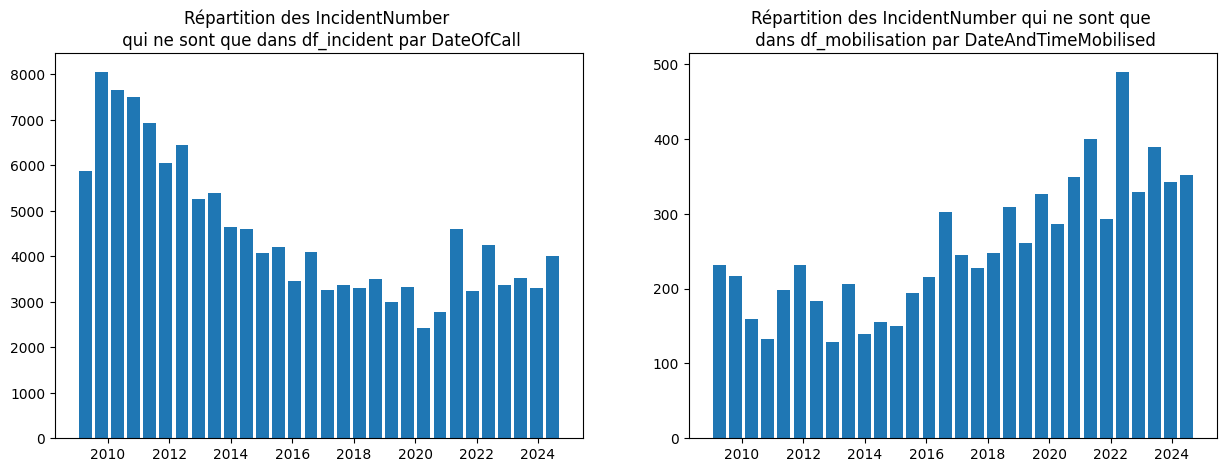

In [ ]:
# graphiques montrant la répartition des incidents par date
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
# Histogramme sur df_inc_non_mob.DateOfCall
plt.hist(df_inc_non_mob.DateOfCall, bins=30, rwidth=0.8);
plt.title('Répartition des IncidentNumber \n qui ne sont que dans df_incident par DateOfCall');

plt.subplot(1,2,2);
# Histogramme sur df_mob_non_inc.DateAndTimeMobilised
plt.hist(df_mob_non_inc.DateAndTimeMobilised, bins=30, rwidth=0.8);
plt.title('Répartition des IncidentNumber qui ne sont que \n dans df_mobilisation par DateAndTimeMobilised');

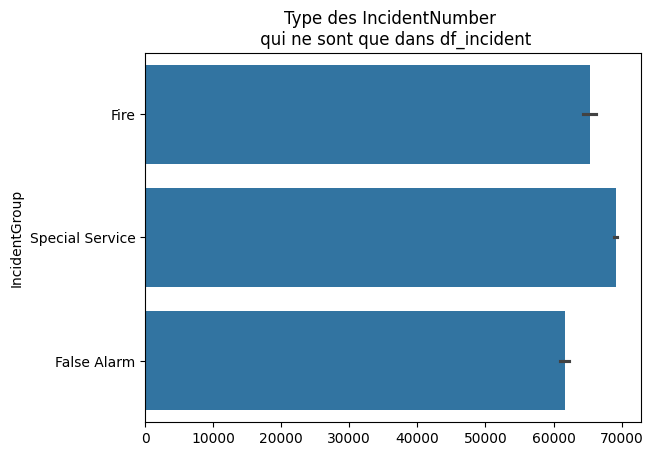

In [ ]:
sns.barplot(df_inc_non_mob["IncidentGroup"]);
plt.title('Type des IncidentNumber \n qui ne sont que dans df_incident');

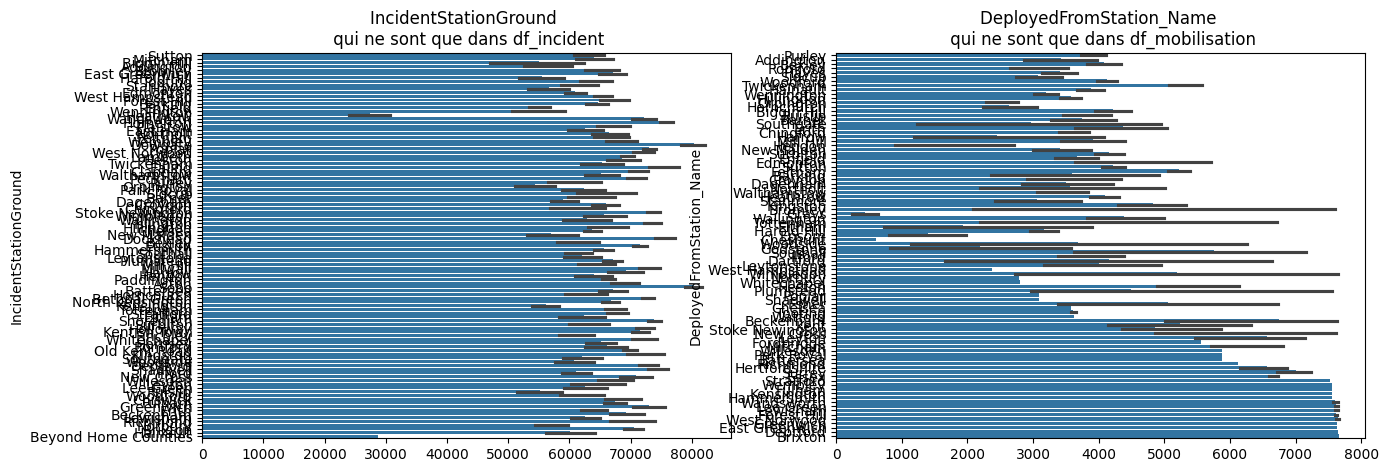

In [ ]:
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
sns.barplot(df_inc_non_mob["IncidentStationGround"]);
plt.title('IncidentStationGround \n qui ne sont que dans df_incident');
plt.subplot(1,2,2);
sns.barplot(df_mob_non_inc["DeployedFromStation_Name"]);
plt.title('DeployedFromStation_Name \n qui ne sont que dans df_mobilisation');

In [ ]:
tmp1=df_inc_non_mob["IncidentStationGround"].str.replace(' ', '').unique()
tmp2=df_mob_non_inc["DeployedFromStation_Name"].str.replace(' ', '').unique()

print('Nombres de casernes dans  df_inc_non_mob: ', len(tmp1))
print('Nombres de casernes dans df_mob_non_inc : ', len(tmp2))
print('\n')

print('Nombre de casernes communes entre les 2 datasets :', len(set(tmp1).intersection(tmp2)))


Nombres de casernes dans  df_inc_non_mob:  103
Nombres de casernes dans df_mob_non_inc :  91


Nombre de casernes communes entre les 2 datasets : 78


Parmi les incidents qui ne sont que dans `df_incident`,  ils sont plus nombreux avant 2014 mais il y a des cas tous les ans. Il n'y a pas un type d'incident plus concerné qu'un autre.

Parmi les incidents qui ne sont que dans `df_mobilisation`, là encore, tous les ans sont concernés.

Les graphiques montrant les incidents qui ne sont que dans un des dataframes en fonction de la caserne sont peu lisibles vu le nombre de casernes représentées. Il semblerait à nouveau qu'il n'y ait pas une caserne particulièrement concernée. La plupart des casernes apparaissent dans les 2 datasets.

Nous avons écrit au service des données de *London Fire Brigade* et leur avons demandé s'il y avait une raison à ces écarts. Nous attendons actuellement un retour de leur part (notre du 12/11/2024).

In [ ]:
del df_inc_non_mob, df_mob_non_inc, tmp1, tmp2

## <font color='blue'> 6.b) Suppression des données antérieures au 09/01/2014 </font>

Le 9 Janvier 2014, 10 casernes ont été fermées par les autorités londoniennes. Cela explique dans le dataframe `df_incident` la variable `IncGeo_WardNameNew` car les données sur les casernes fermées ont été réaffectées à d'autres Wards. Si la localisation de la caserne est une variable explicative du temps de réponse (ce qui semble probable intuitivement), alors utiliser les données antérieures au 09/01/204 pourrait biaiser les résultats du modèle.

Nous avons donc fait le choix de travailler uniquement sur les données postérieures au 09/01/2014.

L'objectif étant de modéliser le temps de réponse, nous supprimons aussi les lignes avec des valeurs manquantes pour les variables de dates ou de temps dans `df_mobilisation`.

In [ ]:
# selection sur df_incident des DateOfCall > 09/01/2014
df_incident_2014=df_incident.loc[df_incident.DateOfCall>=dt.datetime(2014, 1, 10,0,0,0,0),:].copy(deep=True)
# selection sur df_incident des DateAndTimeMobilised > 09/01/2014 et sans valeur manquante sur TotalResponseTime
df_mobilisation_2014=df_mobilisation.loc[(df_mobilisation.DateAndTimeMobilised>=dt.datetime(2014, 1, 10,0,0,0,0)) & (df_mobilisation.TotalResponseTime.isna()==False),:].copy(deep=True)


In [ ]:
print('Nombres de valeurs de IncidentNumber dans df_incident : ', df_incident["IncidentNumber"].nunique())
print('Nombres de valeurs de IncidentNumber dans df_incident_2014 : ', df_incident_2014["IncidentNumber"].nunique())

print('\n')
print('Nombres de valeurs de IncidentNumber dans df_mobilisation : ', df_mobilisation["IncidentNumber"].nunique())
print('Nombres de valeurs de IncidentNumber dans df_mobilisation_2014 : ', df_mobilisation_2014["IncidentNumber"].nunique())


Nombres de valeurs de IncidentNumber dans df_incident :  1759590
Nombres de valeurs de IncidentNumber dans df_incident_2014 :  1171543


Nombres de valeurs de IncidentNumber dans df_mobilisation :  1630766
Nombres de valeurs de IncidentNumber dans df_mobilisation_2014 :  1096103


On vérifie les données manquantes pour les 2 dataframes créés

In [ ]:
display(df_incident_2014.shape) # 1171543 entrées, 44 variables
tmp=df_incident_2014.isna().sum() # on récupère les données avec des na
# Affichage des variables avec des valeurs manquantes
display(100*tmp[tmp>0]/df_incident_2014.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(1171543, 44)

,0
IncidentGroup,0.000512
DetailedIncidentGroup,0.000512
SpecialServiceType,66.311010
PropertyCategory,0.000512
PropertyType,0.000512
AddressQualifier,0.000085
Postcode_full,52.545575
UPRN,2.351343
USRN,3.467052
IncGeo_WardCode,0.041398


In [ ]:
display(df_mobilisation_2014.shape) # 1669664 entrées, 25 variables
tmp=df_mobilisation_2014.isna().sum() # on récupère les données avec des na
# Affichage des variables avec des valeurs manquantes
display(100*tmp[tmp>0]/df_mobilisation_2014.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(1669664, 25)

,0
DateAndTimeLeft,0.105590
DateAndTimeReturned,88.120664
DeployedFromStation_Code,0.001318
DeployedFromStation_Name,0.001318
DelayCodeId,74.970234
DelayCode_Description,74.970234


## <font color='blue'> 6.c) Création de `NumPumpsAttending`  dans `df_mobilisation_2014` </font>

### 6.c.i) Cohérence entre `NumPumpsAttending` et `PumpOrder`

Le nombre de camions sur l'incident (`NumPumpsAttending`) renseigné dans `df_incident_2014` devrait correspondre à la plus grande numérotation du camion dans `df_mobilisation_2014` (valeur maximale de `PumpOrder`). Pour faire cette vérification, on va faire une jointure (inner) entre les deux tables `df_incident_2014` et `df_mobilisation_2014`

In [ ]:
tmp1=list(df_incident_2014["IncidentNumber"].unique())
tmp2=list(df_mobilisation_2014["IncidentNumber"].unique())

tmp1.sort()
tmp2.sort()

print('Nombre de valeurs de IncidentNumber de df_incident_2014 apparaissant aussi dans df_mobilisation_2014 :', len(set(tmp1).intersection(tmp2)))


Nombre de valeurs de IncidentNumber de df_incident_2014 apparaissant aussi dans df_mobilisation_2014 : 1091080


In [ ]:
# jointure entre df_incident_2014 et df_incident_2014 pour comparer NumPumpsAttending et PumpOrder
df_merge = pd.merge(df_incident_2014[['IncidentNumber', 'NumPumpsAttending']], df_mobilisation_2014[['PumpOrder','IncidentNumber']], on='IncidentNumber', how = "inner")

print('Nb IncidentNumber dans df_merge:', len(df_merge['IncidentNumber'].unique())) # on vérifie qu'il y a bien 1091080 valeurs pour IncidentNumber

Nb IncidentNumber dans df_merge: 1091080


In [1]:
# on récupère dans df_merge1 le max de PumpOrder
df_merge1=pd.DataFrame(data=df_merge[['IncidentNumber','PumpOrder']].groupby('IncidentNumber').max().values, columns=['MaxPumpOrder'])
df_merge1['IncidentNumber']=df_merge[['IncidentNumber','PumpOrder']].groupby('IncidentNumber').max().index

# on récupère NumPumpsAttending sans doublon dans df_merge2
df_merge2=df_merge[['IncidentNumber','NumPumpsAttending']].drop_duplicates()

# on joint les 2 tables puis on vérifie si NumPumpsAttending=MaxPumpOrder
df_merge3=pd.merge(df_merge1, df_merge2, on='IncidentNumber', how='inner')

print('Nb IncidentNumber dans df_merge3 :', len(df_merge['IncidentNumber'].unique())) # on vérifie qu'il y a bien 1090241 valeurs pour IncidentNumber
print('Nb IncidentNumber dans df_merge3 où NumPumpsAttending=MaxPumpOrder :', sum(df_merge3.NumPumpsAttending==df_merge3.MaxPumpOrder),
    '(', np.round(100*sum(df_merge3.NumPumpsAttending==df_merge3.MaxPumpOrder)/len(df_merge['IncidentNumber'].unique()),1), '% des IncidentNumber)')

NameError: name 'pd' is not defined

In [ ]:
# on regarde des cas où NumPumpsAttending !MaxPumpOrder
display(df_merge3.loc[df_merge3.NumPumpsAttending!=df_merge3.MaxPumpOrder].head())
display(df_merge3.loc[df_merge3.NumPumpsAttending!=df_merge3.MaxPumpOrder].tail())

,MaxPumpOrder,IncidentNumber,NumPumpsAttending
0,1,1143,2.0
5,1,3143,2.0
17,1,11142,2.0
19,1,12152,3.0
25,1,16152,2.0


,MaxPumpOrder,IncidentNumber,NumPumpsAttending
1090680,3,21332930122022,4.0
1090736,1,21341930122022,2.0
1090793,1,21350231122022,2.0
1090949,2,21372931122022,3.0
1091058,1,21392531122022,2.0


Dans presque 96% des cas, le nombre de camions déployés sur l'incident (`NumpPumpsAttending`) correspond à la numérotation maximal des camions (max(`PumpOrder`)).
Pour faire la jointure, nous allons ajouter à `df_mobilisation_2014` la variable `MaxPumpOrder` et nous utiliserons cette variable comme clé de jointure. Ainsi, nous supprimerons les données avec des incohérences sur ces variables. Pour simplifier la jointure, nous appelerons cette variable `NumpPumpsAttending` comme dans df_incident

In [ ]:
del df_merge, df_merge1, df_merge2, df_merge3, tmp1, tmp2 # suppression des variables temporaires

### 6.c.iii) Création de `NumPumpsAttending`  dans `df_mobilisation_2014`

In [ ]:
# on créé df_merge qui contient le max de PumpOrder pour chaque IncidentNumber de df_mobilisation_2014
df_merge=pd.DataFrame(data=df_mobilisation_2014[['IncidentNumber','PumpOrder']].groupby('IncidentNumber').max().values, columns=['NumPumpsAttending'])
df_merge['IncidentNumber']=df_mobilisation_2014[['IncidentNumber','PumpOrder']].groupby('IncidentNumber').max().index

# pour ajouter la colonne NumpPumpsAttending à df_mobilisation_2014, il faut faire une jointure (car il peut y avoir plusieurs lignes par IncidentNumber)
df_mob=df_mobilisation_2014.merge(df_merge, on='IncidentNumber', how='outer' )


In [ ]:
# on vérifie le merge
display(df_mobilisation_2014.shape)
display(df_mob.shape)

print('cohérence de NumPumpsAttending :', sum(df_mob.NumPumpsAttending>=df_mob.PumpOrder)==df_mob.shape[0])

(1669664, 25)

(1669664, 26)

cohérence de NumPumpsAttending : True


In [ ]:
del df_mobilisation_2014 # suppression de la table sans NumpPumpsAttending

# on conserve la table et renomme la table avec NumpPumpsAttending
df_mobilisation_2014=df_mob
del df_mob

## <font color='blue'> 6.d) Création de `df_mobilisation_2014_unique` </font>

Il semblerait logique que le premier camion arrivant sur les lieux de l'incident soit celui où `PumpOrder=1`. Toutefois, la présence de la variable `PerformanceReporting` laisse entendre que ce n'est pas toujours le cas.

Dans cette section, nous créons la table `df_mobilisation_2014_unique` qui contient une ligne par incident. Pour cela, nous sélectionnons pour chaque incident les lignes où le temps de réponse (`TotalResponseTime`) est le plus petit. Si plusieurs camions arrivent en même temps, il reste des doublons. Nous sélectionnons donc ensuite le camion avec le plus petit `PumpOrder`.

Nous analysons ensuite les valeurs de `PumpOrder`. Nous conservons pour la jointure avec `df_incident_2014` les lignes où `PumpOrder=1` et `PlusCode_Code=Initial`. Comme déjà discuté en section 5, nous doutons de la qualité de données des cas où `PumpOrder=1` et `PlusCode_Code!=Initial`. C'est pourquoi nous supprimons ces cas avant la jointure.

In [ ]:
# on crée un dataframe avec pour chaque incident le temps de réponse le plus court
df_min_rep=pd.DataFrame(data=df_mobilisation_2014[['IncidentNumber','TotalResponseTime']].groupby('IncidentNumber').min().values, columns=['MinResponseTime'])
df_min_rep['IncidentNumber']=df_mobilisation_2014[['IncidentNumber','TotalResponseTime']].groupby('IncidentNumber').min().index

# on joint cette information à df_mobilisation_2014 et on crée un dataframe temporaire df_mob_tmp1 (résultat de la jointure)
df_mob_tmp1=df_mobilisation_2014.merge(df_min_rep, on='IncidentNumber', how='outer' )

In [ ]:
# on vérifie qu'on a le même nombre de lignes avant / après jointure
display(df_mobilisation_2014.shape)
display(df_mob_tmp1.shape)

(1669664, 26)

(1669664, 27)

In [ ]:
# dans df_mob_tmp1 on sélectionne les lignes où le temps de réponse est le minimum
df_mob_tmp2=df_mob_tmp1.loc[df_mob_tmp1.MinResponseTime==df_mob_tmp1.TotalResponseTime].copy(deep=True)
display(df_mob_tmp2.shape)
print('Nb incident dans mobilisation_2014 : ', len(df_mobilisation_2014.IncidentNumber.unique()))

# on constate qu'il reste de doublons car plusieurs camions peuvent arriver en même temps

(1100018, 27)

Nb incident dans mobilisation_2014 :  1096103


In [ ]:
# on regarde le min de PumpOrder dans df_mob_tmp2
df_min_pump=pd.DataFrame(data=df_mob_tmp2[['IncidentNumber','PumpOrder']].groupby('IncidentNumber').min().values, columns=['MinPumpOrder'])
df_min_pump['IncidentNumber']=df_mob_tmp2[['IncidentNumber','PumpOrder']].groupby('IncidentNumber').min().index

# on joint cette information à df_mob_tmp2 et on crée df_mob_tmp3
df_mob_tmp3=df_mob_tmp2.merge(df_min_pump, on='IncidentNumber', how='outer')

In [ ]:
# on vérifie qu'on a le même nombre de lignes avant / après jointure
display(df_mob_tmp2.shape)
display(df_mob_tmp3.shape)

(1100018, 27)

(1100018, 28)

In [ ]:
# dans df_mob_tmp3 on sélectionne les lignes où le PumpOrder est le plus petit, on crée df_mob_tmp4
df_mob_tmp4=df_mob_tmp3.loc[df_mob_tmp3.PumpOrder==df_mob_tmp3.MinPumpOrder].copy(deep=True)

print('Nb incident dans mobilisation_2014 : ', len(df_mobilisation_2014.IncidentNumber.unique()))
print('Nb de lignes dans df_mob_tmp4 : ', df_mob_tmp4.shape[0])
print('Nb incident dans df_mob_tmp4 : ', len(df_mob_tmp4.IncidentNumber.unique()))

Nb incident dans mobilisation_2014 :  1096103
Nb de lignes dans df_mob_tmp4 :  1096103
Nb incident dans df_mob_tmp4 :  1096103


In [ ]:
100*df_mob_tmp4[['PumpOrder']].value_counts()/df_mob_tmp4.shape[0]

,count
PumpOrder,
1,99.270415
2,0.625033
3,0.080102
4,0.017517
5,0.004927
6,0.001825
7,0.000091
9,0.000091


On constate que dans plus de 99% des incidents, le camion numéroté 1 est bien celui (ou parmi ceux) qui est (sont) arrivé(s) le(s) premier(s).

In [ ]:
100*df_mob_tmp4[['PlusCode_Code','PumpOrder']].groupby('PlusCode_Code').value_counts(dropna=False)/df_mob_tmp4.shape[0]

PlusCode_Code  PumpOrder
Initial        1            99.222336
               2             0.605874
               3             0.078551
               4             0.017243
               5             0.004927
               6             0.001825
               7             0.000091
               9             0.000091
add            2             0.019159
               1             0.010400
               3             0.001551
               4             0.000274
rca            1             0.037679
Name: count, dtype: float64

Dans plus de 99%, le camion numéroté 1 est bien celui qui est arrivé le premier et son `PlusCode_Code` est cohérent (`PlusCode_Code=Initial`).

On conserve dans `df_mobilisation_2014_unique` uniquement les incidents avec des informations cohérentes à savoir `PumpOrder=1` et `PlusCode_Code=Initial`. C'est cette table qui sera jointe à `df_incident_2014`.

In [ ]:
# on sauvegarde dans df_mobilisation_2014_unique le dataframe issu de df_mobilisation_2014_unique avec une seule ligne par incident
df_mobilisation_2014_unique=df_mob_tmp4[(df_mob_tmp4.PumpOrder==1) & (df_mob_tmp4.PlusCode_Code=='Initial')]

# suppression des variables inutiles
del df_mob_tmp1, df_mob_tmp2, df_mob_tmp3, df_mob_tmp4, df_min_pump, df_min_rep

In [ ]:
display(df_mobilisation_2014_unique.shape) # 1087579 entrées, 28 variables
tmp=df_mobilisation_2014_unique.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_mobilisation_2014_unique.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(1087579, 28)

,0
DateAndTimeLeft,0.122842
DateAndTimeReturned,87.538285
DeployedFromStation_Code,0.000828
DeployedFromStation_Name,0.000828
DelayCodeId,70.483615
DelayCode_Description,70.483615


#### Point de sauvegarde

Enregistrement sur Google Colab

In [ ]:
df_mobilisation_2014_unique.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation unique data.csv', index=False , encoding='utf-8')

Enregistrement en local

In [ ]:
df_mobilisation_2014_unique = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation unique data.csv',low_memory=False)

Lecture sur Google Colab

In [ ]:
df_mobilisation_2014_unique.to_csv('Data/Datapreprocessing/LFB mobilisation unique data.csv', index=False , encoding='utf-8')

# apres le chargement, il faut modifier le type des dates
df_mobilisation_2014_unique.DateAndTimeMobilised=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobilised)
df_mobilisation_2014_unique.DateAndTimeMobile=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobile)
df_mobilisation_2014_unique.DateAndTimeArrived=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeArrived)

Lecture en local

In [ ]:
df_mobilisation_2014_unique = pd.read_csv('/Data/Datapreprocessing/LFB mobilisation unique data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_mobilisation_2014_unique.DateAndTimeMobilised=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobilised)
df_mobilisation_2014_unique.DateAndTimeMobile=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobile)
df_mobilisation_2014_unique.DateAndTimeArrived=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeArrived)


## <font color='blue'> 6.e) Cohérence des données avant jointure </font>

### 6.e.i) Cohérence des valeurs de date

In [ ]:
print('Nb entrées dans df_mobilisation_2014_unique avant suppression :', df_mobilisation_2014_unique.shape[0])
print('\n')
print( ' Cas où DateMobilised >= DateMobile (données incohérentes):', sum(df_mobilisation_2014_unique['DateAndTimeMobilised']>=df_mobilisation_2014_unique['DateAndTimeMobile']))
print( ' Cas où DateMobile >= DateArrived (données incohérentes):', sum(df_mobilisation_2014_unique['DateAndTimeMobile']>=df_mobilisation_2014_unique['DateAndTimeArrived']))


Nb entrées dans df_mobilisation_2014_unique avant suppression : 1087579


 Cas où DateMobilised >= DateMobile (données incohérentes): 70
 Cas où DateMobile >= DateArrived (données incohérentes): 870


On supprime les données incohérentes sur les dates de `df_mobilisation_2014_unique`

In [ ]:
print('Nb entrées dans df_mobilisation_2014 avant suppression :', df_mobilisation_2014_unique.shape[0])
df_mobilisation_2014_unique=df_mobilisation_2014_unique.loc[(df_mobilisation_2014_unique['DateAndTimeMobilised']<df_mobilisation_2014_unique['DateAndTimeMobile']) &
                                              (df_mobilisation_2014_unique['DateAndTimeMobile']<df_mobilisation_2014_unique['DateAndTimeArrived'])]
print('Nb entrées dans df_mobilisation_2014 après suppression :', df_mobilisation_2014_unique.shape[0])

print('\n')
# vérification
print( ' Cas où DateMobilised >= DateMobile (données incohérentes):', sum(df_mobilisation_2014_unique['DateAndTimeMobilised']>=df_mobilisation_2014_unique['DateAndTimeMobile']))
print( ' Cas où DateMobile >= DateArrived (données incohérentes):', sum(df_mobilisation_2014_unique['DateAndTimeMobile']>=df_mobilisation_2014_unique['DateAndTimeArrived']))

Nb entrées dans df_mobilisation_2014 avant suppression : 1087579
Nb entrées dans df_mobilisation_2014 après suppression : 1086639


 Cas où DateMobilised >= DateMobile (données incohérentes): 0
 Cas où DateMobile >= DateArrived (données incohérentes): 0


##### Point de Sauvegarde

Enregistrement sur Google Colab

In [ ]:
df_mobilisation_2014_unique.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation unique data.csv', index=False , encoding='utf-8')

Enregistrement en local

In [ ]:
df_mobilisation_2014_unique = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation unique data.csv',low_memory=False)

Lecutre sur Google Colab

In [ ]:
df_mobilisation_2014_unique.to_csv('Data/Datapreprocessing/LFB mobilisation unique data.csv', index=False , encoding='utf-8')

# apres le chargement, il faut modifier le type des dates
df_mobilisation_2014_unique.DateAndTimeMobilised=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobilised)
df_mobilisation_2014_unique.DateAndTimeMobile=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobile)
df_mobilisation_2014_unique.DateAndTimeArrived=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeArrived)

Lecture en Local

In [ ]:
df_mobilisation_2014_unique = pd.read_csv('/Data/Datapreprocessing/LFB mobilisation unique data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_mobilisation_2014_unique.DateAndTimeMobilised=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobilised)
df_mobilisation_2014_unique.DateAndTimeMobile=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobile)
df_mobilisation_2014_unique.DateAndTimeArrived=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeArrived)

### 6.e.ii) Cohérence entre `FirstPumpArriving_DeployedFromStation` et `DeployedFromStation_Name`

In [ ]:
df_merge = pd.merge(df_incident_2014[['IncidentNumber', 'FirstPumpArriving_DeployedFromStation']],
                    df_mobilisation_2014_unique[['IncidentNumber', 'DeployedFromStation_Name']].loc[df_mobilisation_2014_unique['PumpOrder']==1],
                    on='IncidentNumber', how = "inner")

In [ ]:
print('Nb d\'incident avec une incohérence sur la provenance du premier camion arrivé :', sum(df_merge['FirstPumpArriving_DeployedFromStation']!=df_merge['DeployedFromStation_Name']),
      '(', round(sum(df_merge['FirstPumpArriving_DeployedFromStation']!=df_merge['DeployedFromStation_Name'])/df_merge.shape[0],6), '%)')
del df_merge

Nb d'incident avec une incohérence sur la provenance du premier camion arrivé : 53 ( 4.9e-05 %)


Lorsque`FirstPumpArriving_DeployedFromStation` est renseignée, il y a très peu de cas où la caserne est différente de celle renseignée dans `DeployedFromStation_Name`. Dans la jointure, seule la variable `DeployedFromStation_Name` sera conservée.

### 6.e.iii) Cohérence entre `IncGeo_WardName` et `IncGeo_WardNameNew`

Avant la jointure, on vérifie que les variables `IncGeo_WardName` et `IncGeo_WardNameNew` sont bien identiques. Ca devrait être le cas puisque nous avons supprimé les incidents antérieurs au 09/01/2014. Les valeurs en écart s'expliquent car ce sont des valeurs manquantes ou une écriture différente du raccourci St (avec ou sans point après) entre les 2 variables.

In [ ]:
df_incident_2014.loc[(df_incident_2014['IncGeo_WardName']!=df_incident_2014['IncGeo_WardNameNew']),['IncGeo_WardName', 'IncGeo_WardNameNew']].drop_duplicates()

,IncGeo_WardName,IncGeo_WardNameNew
12366,NaN,NaN
18549,St Mary's Park,St. Mary's Park
65888,St Mary's,St. Mary's
65957,St Michael's,St. Michael's
887898,St Peter's,St. Peter's


### 6.e.iv) Cohérence entre les variables `CalYear` et `HourOfCall` des 2 dataframes

Les variables `CalYear` et `HourOfCall` sont dans `df_incident_2014` et `df_mobilisation_unique_2014`. Nous avons vérifié qu'elles contiennent les mêmes informations dans les 2 dataframes (pour un même `IncidentNumber`).

In [ ]:
df_merge = pd.merge(df_incident_2014[['IncidentNumber', 'CalYear', 'HourOfCall']],
                    df_mobilisation_2014_unique[['IncidentNumber', 'CalYear', 'HourOfCall']],
                    on='IncidentNumber', how = "inner")

In [ ]:
print('Nb d\'incidents communs entre df_incident_2014 et df_mobilisation_2014_unique :', df_merge.shape[0])
print('Tous ont une valeur de CalYear identique dans les 2 dataframes:', sum(df_merge.CalYear_x==df_merge.CalYear_y)==df_merge.shape[0])
print('Tous ont une valeur de HourOfCall identique dans les 2 dataframes :', sum(df_merge.HourOfCall_x==df_merge.HourOfCall_y)==df_merge.shape[0])

del df_merge

Nb d'incidents communs entre df_incident_2014 et df_mobilisation_2014_unique : 1081721
Tous ont une valeur de CalYear identique dans les 2 dataframes: True
Tous ont une valeur de HourOfCall identique dans les 2 dataframes : True


### 6.e.iv) Cohérence entre `IncidentStationGround` et `DeployedFromStation_Name`

In [ ]:
tmp1=list(df_incident_2014.loc[df_incident_2014.IncidentStationGround.isna()==False, "IncidentStationGround"].unique())
tmp2=list(df_mobilisation_2014_unique.loc[df_mobilisation_2014_unique.DeployedFromStation_Name.isna()==False, "DeployedFromStation_Name"].unique())

tmp1.sort()
tmp2.sort()

print('Nombres de valeurs de IncidentStationGround dans df_incident_2014 : ', len(tmp1))
print('Nombres de valeurs de DeployedFromStation_Name dans df_mobilisation_2014_unique : ', len(tmp2))
print('\n')

print('Nombre de casernes communes entre les 2 datasets :', len(set(tmp1).intersection(tmp2)))
print('Nombre de casernes de df_incident_2014 n\'apparaissant pas dans df_mobilisation_2014_unique :', len(list(set(tmp1) - set(tmp2))))
print('Nombre de casernes de df_mobilisation_2014_unique n\'apparaissant pas dans df_incident_2014 :', len(list(set(tmp2) - set(tmp1))))

Nombres de valeurs de IncidentStationGround dans df_incident_2014 :  103
Nombres de valeurs de DeployedFromStation_Name dans df_mobilisation_2014_unique :  114


Nombre de casernes communes entre les 2 datasets : 102
Nombre de casernes de df_incident_2014 n'apparaissant pas dans df_mobilisation_2014_unique : 1
Nombre de casernes de df_mobilisation_2014_unique n'apparaissant pas dans df_incident_2014 : 12


In [ ]:
print('casernes de df_incident_2014 n\'apparaissant pas dans df_mobilisation_2014_unique: ', list(set(tmp1) - set(tmp2)))
print('\n')
print('casernes de df_mobilisation_2014_unique n\'apparaissant pas dans df_incident_2014: ', list(set(tmp2) - set(tmp1)))

casernes de df_incident_2014 n'apparaissant pas dans df_mobilisation_2014_unique:  ['Beyond Home Counties']


casernes de df_mobilisation_2014_unique n'apparaissant pas dans df_incident_2014:  ['Epsom', 'Kent', 'Godstone', 'Surrey', 'Dartford', 'Buckinghamshire', 'Essex', 'Fordbridge', 'Hertfordshire', 'Esher', 'Staines', 'Watford']


Comme indiqué dans la section 5, nous avons obtenu de la part du service des données de *London Fire Brigade* la liste de ces casernes avec leurs coordonnées géographiques. Les 13 casernes listées ci-dessus n'apparaissent pas dans ce fichier. Nous vérifierons si ces casernes apparaissent après la jointure.

*Nota Bene* : nous avons demandé au service de données de *London Fire Brigade* des explications sur ces 13 casernes. Au 12/11/2024, nous sommes en attente d'un retour de leur part.

## <font color='blue'> 6.f) Jointure </font>

### 6.f.i) Jointure

Nous réalisons la jointure entre `df_incident_2014` et `df_mobilisation_unique_2014` en

*   Prenant `IncidentNumber` et `NumpPumpsAttending` comme clé de jointure
*   Conservant uniquement certaines variables de chaque dataframe



In [ ]:
# selection de colonnes pour la jointure
col_incident=['IncidentNumber','DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall', 'DayOfWeek', 'Month',
              'IncidentGroup', 'DetailedIncidentGroup','PropertyCategory', 'HighPropertyType', 'PropertyType','AddressQualifier','GoodLocation',
              'IncGeo_BoroughCode', 'IncGeo_BoroughName', 'IncGeo_WardCode', 'IncGeo_WardName',
              'Easting_rounded', 'Northing_rounded', 'Latitude','Longitude',
              'IncidentStationGround','NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount','NumCalls'
              ]

col_mobilisation=['IncidentNumber', 'ResourceMobilisationId','Resource_Code',
                  'DateAndTimeMobilised','DateAndTimeMobile', 'DateAndTimeArrived',
                  'TurnoutTimeSeconds', 'TravelTimeSeconds','TotalResponseTime',
                  'DeployedFromStation_Code', 'DeployedFromStation_Name', 'FromHomeStation', 'TopDelay', 'NumPumpsAttending'
                ]

df_incident_mobilisation = pd.merge(df_incident_2014[col_incident], df_mobilisation_2014_unique.loc[(df_mobilisation_2014_unique.PumpOrder==1) & (df_mobilisation_2014_unique.PlusCode_Code=='Initial'), col_mobilisation], on=['IncidentNumber', 'NumPumpsAttending'], how = "inner")




A noter, on a les mêmes proportions d'incidents n'apparaissant que dans `df_incident_2014` (7,7%) ou `df_mobilisation_2014_unique` (0.5%) que dans `df_incident` / `df_mobilisation` (voir section 6.a).

In [ ]:
tmp1=list(df_incident_2014["IncidentNumber"].unique())
tmp2=list(df_mobilisation_2014_unique["IncidentNumber"].unique())

tmp1.sort()
tmp2.sort()

print('Nombres de valeurs de IncidentNumber dans df_incident_2014 : ', len(tmp1))
print('Nombres de valeurs de IncidentNumber dans df_mobilisation_2014_unique : ', len(tmp2))
print('\n')

print('Nombre de valeurs de IncidentNumber communes entre les 2 datasets :', len(set(tmp1).intersection(tmp2)))
print('Nombre de valeurs de IncidentNumber de df_incident_2014 n\'apparaissant pas dans df_mobilisation_2014_unique :', len(list(set(tmp1) - set(tmp2))),
      '(', np.round(100*len(list(set(tmp1) - set(tmp2)))/len(tmp1),1 ), '% de df_incident_2014)')
print('Nombre de valeurs de IncidentNumber de df_mobilisation_2014_unique n\'apparaissant pas dans df_incident_2014 :', len(list(set(tmp2) - set(tmp1))),
      '(', np.round(100*len(list(set(tmp2) - set(tmp1)))/len(tmp2),1 ), '% de df_mobilisation_2014_unique)')

Nombres de valeurs de IncidentNumber dans df_incident_2014 :  1171543
Nombres de valeurs de IncidentNumber dans df_mobilisation_2014_unique :  1086639


Nombre de valeurs de IncidentNumber communes entre les 2 datasets : 1081721
Nombre de valeurs de IncidentNumber de df_incident_2014 n'apparaissant pas dans df_mobilisation_2014_unique : 89822 ( 7.7 % de df_incident_2014)
Nombre de valeurs de IncidentNumber de df_mobilisation_2014_unique n'apparaissant pas dans df_incident_2014 : 4918 ( 0.5 % de df_mobilisation_2014_unique)


Pour rappel, dans environ 4% des cas, le nombre de camions déployés sur l'incident (`NumpPumpsAttending`) n'est pas cohérent entre les dataframes `df_incident_2014` et `df_mobilisation_2014_unique` (voir section 6.c).
Cela explique le nombre d'incident dans `df_incident_mobilisation`.

In [ ]:
print('Nombre de valeurs de IncidentNumber communes entre df_incident_2014 et df_mobilisation_2014_unique  :', len(set(tmp1).intersection(tmp2)))
print('Nombre de valeurs de IncidentNumber dans df_incident_mobilisation  :', df_incident_mobilisation.shape[0], 'soit (', np.round(100*df_incident_mobilisation.shape[0]/len(set(tmp1).intersection(tmp2)),2), '%)')

del tmp1, tmp2

Nombre de valeurs de IncidentNumber communes entre df_incident_2014 et df_mobilisation_2014_unique  : 1081721
Nombre de valeurs de IncidentNumber dans df_incident_mobilisation  : 1037720 soit ( 95.93 %)


### 6.f.ii) Suppression valeurs manquantes

In [ ]:
display(df_incident_mobilisation.shape) # 1037720 entrées, 39 variables
tmp=df_incident_mobilisation.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_incident_mobilisation.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(1037720, 39)

,0
IncGeo_WardCode,0.042979
IncGeo_WardName,0.042979
Latitude,51.242339
Longitude,51.242628
IncidentStationGround,0.000096
DeployedFromStation_Code,0.000482
DeployedFromStation_Name,0.000482


Il y a des valeurs manquantes pour certaines variables. Toutes ne seront pas utilisées lors de la modélisation


*   `IncGeo_WardCode` / `IncGeo_WardName` : Nous n'utiliserons pas le Ward dans la modélisation car il y a trop de modalités. Cette donnée est conservée pour les statistiques descriptives et la visualisation des données. On ne traitera pas les données manquantes
*   Pour pouvoir représenter les incidents sur une carte, nous allons approximer les valeurs manquantes de `Latitude`/`Longitude` grâce à `Easting_rounded`/`Northing_rounded`
*   On choisit de supprimer les lignes où il y a des valeurs manquantes sur `IncidentStationGround`, `DeployedFromStation_Code` ou `DeployedFromStation_Name` car cela représente un très faible pourcentage des incidents.

In [ ]:
df_incident_mobilisation.dropna(subset=['IncidentStationGround','DeployedFromStation_Code' ,'DeployedFromStation_Name' ], inplace=True)


In [ ]:
display(df_incident_mobilisation.shape) # 1037714 entrées, 39 variables
tmp=df_incident_mobilisation.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_incident_mobilisation.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(1037714, 39)

,0
IncGeo_WardCode,0.042979
IncGeo_WardName,0.042979
Latitude,51.242635
Longitude,51.242924


### 6.f.ii) Analyse des variables sur les casernes </font>

Dans la table jointe, il y a 2 variables avec des information sur les casernes : `IncidentStationGround` (issue de `df_incident`) et `DeployedFromStation_Name` (issue de `df_mobilisation`).

Il y a une seule caserne dans `DeployedFromStation_Name` qui n'apparait pas dans `IncidentStationGround` : *Hertfordshire* et toutes les casernes de `IncidentStationGround` apparaissent dans `DeployedFromStation_Name`.

Comme indiqué en section 6.e, cette caserne n'apparaît pas dans le fichier fourni par le service des données de *London Fire Brigade*

In [ ]:
tmp1=list(df_incident_mobilisation["IncidentStationGround"].unique())
tmp2=list(df_incident_mobilisation["DeployedFromStation_Name"].unique())

tmp1.sort()
tmp2.sort()

print('Nombres de valeurs de IncidentStationGround dans df_incident_2014 : ', len(tmp1))
print('Nombres de valeurs de DeployedFromStation_Name dans df_mobilisation_2014_unique : ', len(tmp2))
print('\n')

print('Nombre de casernes communes à IncidentStationGround et  DeployedFromStation_Name :', len(set(tmp1).intersection(tmp2)))
print('Nombre de casernes de IncidentStationGround n\'apparaissant pas dans DeployedFromStation_Name :', len(list(set(tmp1) - set(tmp2))))
print('Nombre de casernes de DeployedFromStation_Name n\'apparaissant pas dans IncidentStationGround :', len(list(set(tmp2) - set(tmp1))))

print('Nom de la caserne de DeployedFromStation_Name n\'apparaissant pas dans IncidentStationGround :', list(set(tmp2) - set(tmp1)))

Nombres de valeurs de IncidentStationGround dans df_incident_2014 :  102
Nombres de valeurs de DeployedFromStation_Name dans df_mobilisation_2014_unique :  103


Nombre de casernes communes à IncidentStationGround et  DeployedFromStation_Name : 102
Nombre de casernes de IncidentStationGround n'apparaissant pas dans DeployedFromStation_Name : 0
Nombre de casernes de DeployedFromStation_Name n'apparaissant pas dans IncidentStationGround : 1
Nom de la caserne de DeployedFromStation_Name n'apparaissant pas dans IncidentStationGround : ['Hertfordshire']


Il y a un seul incident avec cette caserne. Nous choisissons de le supprimer.

In [ ]:
df_incident_mobilisation[df_incident_mobilisation.DeployedFromStation_Name=='Hertfordshire'].shape

(1, 39)

In [ ]:
print(df_incident_mobilisation.shape)
dfim = df_incident_mobilisation.loc[df_incident_mobilisation.DeployedFromStation_Name!='Hertfordshire',:].copy(deep=True)

del df_incident_mobilisation
df_incident_mobilisation = dfim
del dfim
print(df_incident_mobilisation.shape)


(1037714, 39)
(1037713, 39)


Dans 75,6% des incidents, les valeurs de `IncidentStationGround` et `DeployedFromStation_Name`sont identiques.

In [ ]:
print('Nb d\'incident où IncidentStationGround=DeployedFromStation_Name : ',
    sum(df_incident_mobilisation["IncidentStationGround"]==df_incident_mobilisation["DeployedFromStation_Name"]),
      'soit (', np.round(100*sum(df_incident_mobilisation["IncidentStationGround"]==df_incident_mobilisation["DeployedFromStation_Name"])/df_incident_mobilisation.shape[0],2), '%)'
)

Nb d'incident où IncidentStationGround=DeployedFromStation_Name :  784537 soit ( 75.6 %)


Dans plus de 90% des cas, lorsque les valeurs sont différentes, le camion provient pourtant de la caserne de stationnement (`FromHomeStation`=1)

In [ ]:
# df_incident_mobilisation.loc[df_incident_mobilisation["IncidentStationGround"]!=df_incident_mobilisation["DeployedFromStation_Name"],["IncidentStationGround","DeployedFromStation_Name", 'FromHomeStation']].head()
df_incident_mobilisation.loc[df_incident_mobilisation["IncidentStationGround"]!=df_incident_mobilisation["DeployedFromStation_Name"],['FromHomeStation']].value_counts(normalize=True)

,proportion
FromHomeStation,
1,0.929571
0,0.070429


ce n'est pas la variable `FromHomeStation` qui explique les différences entre `IncidentStationGround` et `DeployedFromStation_Name`. D'ailleurs, FromHomeStation peut aussi prendre la valeur 1 lorsque les deux variables sont identiques.

In [ ]:
df_incident_mobilisation.loc[df_incident_mobilisation["IncidentStationGround"]==df_incident_mobilisation["DeployedFromStation_Name"],['FromHomeStation']].value_counts(normalize=True)

,proportion
FromHomeStation,
1,0.974175
0,0.025825


Nous n'avons pas assez de détails sur le contenu des variables `IncidentStationGround` et `DeployedFromStation_Name` pour savoir s'il est attendu ou non d'avoir des valeurs identiques pour les deux. Nous avons demandé des précisions sur leur définition au service des données de la *London Fire Brigade* et attendons un retour (note au 12/11/2024).

En fonction de ce retour, nous pourrions sélectionner les incidents où `IncidentStationGround = DeployedFromStation_Name`.

### 6.f.iii) Ajout coordonnées géographiques </font>

#### Conversion de `Easting_rounded` / `Northing_rounded` en `Latitude` / `Longitude`

Nous avons vu en section 5 que le calcul des longitudes et latitude est long (environ 17 minutes pour 10 000 valeurs). Nous allons donc dans un premier temps créer un dataframe sans doublon sur `Easting_rounded` et `Northing_rounded`. Ce dataframe (`comp_lat_long`) contient environ 75 000 entrées. Il faut environ 2h10 pour convertir l'ensemble de ces valeurs en latitude/longitude.

In [ ]:
# dataframe avec les valeurs de Easting_rounded/Northing_rounded dans le cas où la latitude ou longitude est manquante
comp_lat_long=df_incident_mobilisation.loc[(df_incident_mobilisation.Latitude.isna()==True) | ((df_incident_mobilisation.Longitude.isna()==True)), ['Easting_rounded', 'Northing_rounded']].copy(deep=True).drop_duplicates()

display(comp_lat_long.shape) # nb de valeurs distinctes de couple Easting_rounded/Northing_rounded


(75304, 2)

In [ ]:
# calcul de la latitude et longitude (attention programme très long 2h10)
lat_r=(comp_lat_long['Easting_rounded'].astype('str') + ' ' + comp_lat_long['Northing_rounded'].astype('str')).apply(lambda x: convert_BNG_to_latlon(float(x.split(' ')[0]), float(x.split(' ')[1]))[0])
long_r=(comp_lat_long['Easting_rounded'].astype('str') + ' ' + comp_lat_long['Northing_rounded'].astype('str')).apply(lambda x: convert_BNG_to_latlon(float(x.split(' ')[0]), float(x.split(' ')[1]))[1])

In [ ]:
# on ajoute les latitudes/longitudes calculées à comp_lat_long
comp_lat_long['Latitude_r']=lat_r
comp_lat_long['Longitude_r']=long_r

Travail sur Google Colab

In [ ]:
# on sauvegarde les valeurs pour ne pas avoir à refaire le calcul (qui prend plus de 2h)
comp_lat_long.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/comp_lat_long.csv', index=False , encoding='utf-8')

In [ ]:
# chargement de comp_lat_long au besoin
comp_lat_long=pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/comp_lat_long.csv')

Travail en local

In [ ]:
# on sauvegarde les valeurs pour ne pas avoir à refaire le calcul (qui prend plus de 2h)
comp_lat_long.to_csv('../Data/Datapreprocessing/comp_lat_long.csv', index=False , encoding='utf-8')

In [ ]:
# chargement de comp_lat_long au besoin
comp_lat_long=pd.read_csv('../Data/Datapreprocessing/comp_lat_long.csv')

#### Création de `IncGeo_Rounded`

La variable `IncGeo_Rounded` vaut
*   0 si les valeurs de latitude et longitude sont renseignées à l'origine
*   1 si au moins l'une des 2 coordonnées géoraphiques est approximée via la conversion de `Easting_rounded`/`Northing_rounded`.

In [ ]:
# création de la variable IncGeo_Rounded (=1 si on a dû calculer les lat/long à partir des coordonnées BNG)
df_incident_mobilisation['IncGeo_Rounded']=0

df_incident_mobilisation.loc[(df_incident_mobilisation.Latitude.isna()==True) | ((df_incident_mobilisation.Longitude.isna()==True)),'IncGeo_Rounded']=1

#### Imputation des valeurs manquantes de `Latitude` / `Longitude`

In [ ]:
# on joint df_incident_mobilisation à comp_lat_long
df_merge = pd.merge(df_incident_mobilisation, comp_lat_long, on=['Easting_rounded', 'Northing_rounded'], how = "outer")

In [ ]:
# on vérifie la jointure
display(df_incident_mobilisation.shape) # 1037714, 40 variables
display(df_merge.shape) # 1037714, 42 variables (ajout de Latitude_r et Longitude_r)

print('\n')
print('valeurs manquantes de df_incident_mobilisation')
display(df_incident_mobilisation.shape) # 1037714 entrées, 43 variables
tmp=df_merge.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_merge.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

print('\n')
print('valeurs manquantes de df_merge')
display(df_merge.shape) # 1037714 entrées, 43 variables
tmp=df_merge.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_merge.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

print('\n')
print('valeurs manquantes de Latitude_r/Longitude_r lorsque Latitude/Longitude sont manquants')
# Il y a des valeurs manquantes pour Latitude_r/Longitude_r mais est-ce lorsque Latitude/Longitude sont manquants ? --> Non
display(df_merge.loc[(df_merge.Latitude.isna()==True) | ((df_merge.Longitude.isna()==True)),['Latitude_r', 'Longitude_r']].isna().sum())

(1037713, 40)

(1037713, 42)



valeurs manquantes de df_incident_mobilisation


(1037713, 40)

,0
IncGeo_WardCode,0.042979
IncGeo_WardName,0.042979
Latitude,51.242685
Longitude,51.242974
Latitude_r,12.687805
Longitude_r,12.687805




valeurs manquantes de df_merge


(1037713, 42)

,0
IncGeo_WardCode,0.042979
IncGeo_WardName,0.042979
Latitude,51.242685
Longitude,51.242974
Latitude_r,12.687805
Longitude_r,12.687805




valeurs manquantes de Latitude_r/Longitude_r lorsque Latitude/Longitude sont manquants


,0
Latitude_r,0
Longitude_r,0


In [ ]:
# on remplace dans df_merge les valeurs manquantes de Latitude / Longitude par les valeurs converties Latitude_r / Longitude_r
df_merge.loc[(df_merge.Latitude.isna()==True),'Latitude']=df_merge.loc[(df_merge.Latitude.isna()==True),'Latitude_r']
df_merge.loc[(df_merge.Longitude.isna()==True),'Longitude']=df_merge.loc[(df_merge.Longitude.isna()==True),'Longitude_r']

# on supprime les colonnes Latitude_r et Longitude_r
df_merge.drop(columns=['Latitude_r', 'Longitude_r'], inplace=True)

# on vérifie les valeurs manquantes
tmp=df_merge.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_merge.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

,0
IncGeo_WardCode,0.042979
IncGeo_WardName,0.042979


In [ ]:
# on compare les distributions
print('Distribution dans df_incident_mobilisation')
display(df_incident_mobilisation[['Latitude', 'Longitude']].describe())
print('\n')

print('Distribution dans df_merge sur les valeurs avec IncGeo_Rounded=0')
display(df_merge.loc[df_merge.IncGeo_Rounded==0, ['Latitude', 'Longitude']].describe())

# même distribution comme attendu vu que dans ce cas les coordonnées sont les mêmes dans les 2 dataframes

Distribution dans df_incident_mobilisation


,Latitude,Longitude
count,505961.000000,505958.000000
mean,51.506870,-0.117694
std,0.066403,0.147888
min,51.287216,-0.510155
25%,51.468349,-0.197013
50%,51.513035,-0.116386
75%,51.548093,-0.028035
max,51.691310,0.322219




Distribution dans df_merge sur les valeurs avec IncGeo_Rounded=0


,Latitude,Longitude
count,505958.000000,505958.000000
mean,51.506870,-0.117694
std,0.066403,0.147888
min,51.287216,-0.510155
25%,51.468348,-0.197013
50%,51.513034,-0.116386
75%,51.548093,-0.028035
max,51.691310,0.322219


In [ ]:
print('Distribution dans df_merge sur l\'ensemble des valeurs')
display(df_merge[['Latitude', 'Longitude']].describe())
print('\n')

# les statistiques descriptives sont similaires dans le cas du recalcul
print('Distribution dans df_merge sur les valeurs avec IncGeo_Rounded=1')
display(df_merge.loc[df_merge.IncGeo_Rounded==1, ['Latitude', 'Longitude']].describe())

Distribution dans df_merge sur l'ensemble des valeurs


,Latitude,Longitude
count,1.037713e+06,1.037713e+06
mean,5.150761e+01,-1.186414e-01
std,6.634600e-02,1.401087e-01
min,5.128722e+01,-5.101547e-01
25%,5.146833e+01,-1.975440e-01
50%,5.151340e+01,-1.152966e-01
75%,5.155046e+01,-3.579700e-02
max,5.169131e+01,3.222187e-01




Distribution dans df_merge sur les valeurs avec IncGeo_Rounded=1


,Latitude,Longitude
count,531755.000000,531755.000000
mean,51.508315,-0.119543
std,0.066284,0.132277
min,51.293365,-0.498784
25%,51.468314,-0.197858
50%,51.514027,-0.114291
75%,51.552101,-0.041826
max,51.685863,0.314581


In [ ]:
del df_incident_mobilisation

df_incident_mobilisation=df_merge

del df_merge

### 6.f.iv) Calcul de la distance

#### Coordonnées géographiques des casernes

Une fois les coordonnées géographiques complétées, nous pouvons calculer la distance entre le lieu de l'incident et la caserne de pompier depuis laquelle le camion part. Il semble cohérent que cette distance affecte le temps de trajet.

In [ ]:
# chargement des données sur les casernes
df_firestation=pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/FireStationInfo.csv',sep=';')
display(df_firestation.head())

# on change le nom de la variable Station name pour qu'elle est le même nom que la colonne DeployedFromStation_Name
df_firestation.rename(columns={'Station name': 'DeployedFromStation_Name', 'Longitude':'Long_station', 'Latitude':'Lat_station'}, inplace=True)


,Station name,Closed,Easting,Northing,Latitude,Longitude
0,Acton,0,519679.0,180078.0,51.506970,-0.276957
1,Addington,0,537692.0,163268.0,51.351814,-0.024094
2,Barking,0,544997.0,183281.0,51.529827,0.088925
3,Barnet,0,525607.0,195840.0,51.647335,-0.185955
4,Battersea,0,527261.0,175825.0,51.467093,-0.169299


In [ ]:
# en regardant les statistiques descriptives, il y a une valeur de longitude aberrante
display(df_firestation.describe())
print('\n')

display(df_firestation[df_firestation.Long_station==-7.740785122])

print('\n')
print('Longitude attentue pour West Norwood :', convert_BNG_to_latlon(531822.9, 171359.1)[1])


,Closed,Easting,Northing,Lat_station,Long_station
count,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.088496,531450.556637,179939.947788,51.501907,-0.175055
std,0.285279,10539.270148,7908.457749,0.073166,0.733977
min,0.000000,507113.000000,159133.000000,51.300350,-7.740785
25%,0.000000,525395.000000,175632.000000,51.463744,-0.200951
50%,0.000000,531822.900000,180078.000000,51.502892,-0.105051
75%,0.000000,538051.000000,185107.000000,51.551691,-0.013648
max,1.000000,554197.000000,197513.000000,51.660233,0.223527


,DeployedFromStation_Name,Closed,Easting,Northing,Lat_station,Long_station
105,West Norwood,0,531822.9,171359.1,51.30035,-7.740785




Longitude attentue pour West Norwood : -0.105324


In [ ]:
# on modifie donc cette valeur avant la jointure
df_firestation.loc[df_firestation.DeployedFromStation_Name=='West Norwood', 'Long_station']=convert_BNG_to_latlon(531822.9, 171359.1)[1]

In [ ]:
# on joint les données pour ajouter sur df_incident_mobilisation les coordonnées des casernes
df_merge = pd.merge(df_incident_mobilisation, df_firestation[['DeployedFromStation_Name', 'Lat_station', 'Long_station']], on=['DeployedFromStation_Name'], how = "inner")

In [ ]:
# on vérifie la jointure
print('shape de df_incident_mobilisation :', df_incident_mobilisation.shape)
print('shape de df_merge :', df_merge.shape)

shape de df_incident_mobilisation : (1037713, 40)
shape de df_merge : (1037713, 42)


#### Méthode pour le calcul de la distance

In [ ]:
def compute_dist(lat1, lon1, lat2, lon2):
    """
    Calcule la distance à partir de coordonnées géographiques (latitude et longitude).

    Args:
        lat1, lat2 : latitudes des 2 points
        lon1, lon2 : longitudes des 2 points

    Returns:
        float : la distance (en mètres) entre les 2 points.
    """

    geod = Geod(ellps='WGS84')
    azimuth1, azimuth2, distance = geod.inv(lon1, lat1, lon2, lat2)
    return np.round(distance, 3)


In [ ]:
# on vérifie le bon fonctionnement de la fonction à partir d'un exemple trouvé sur internet : la distance entre Londres et Berlin
lat_lon, lon_lon, lat_ber, lon_ber = 51.5073219,  -0.1276474, 52.5170365,  13.3888599
print('Distance à vol d\'oiseau entre Londres et Berlin (en metres) :', compute_dist(lat_lon, lon_lon, lat_ber, lon_ber) )
# la distance entre Londres et Berlin est de 932,08 km d'après Google. L'écart s'explique sans doute par des approximations dans les coordonnées géographiques et/ou dans le calcul de la distance
# il est minime

Distance à vol d'oiseau entre Londres et Berlin (en metres) : 933410.764


#### Calcul de la distance

Contrairement au calcul de longitude et latitude à partir des coordonnées du `British National Grid`, le calcul de la distance à partir des coordonnées géographiques du lieu d'incident et de celles de la caserne est très rapide (moins de 1 minute). Nous avons donc fait ce calcul sur df_merge.

In [ ]:
df_merge['distance'] = (df_merge['Latitude'].astype('str') + ' ' + df_merge['Longitude'].astype('str') + ' ' + \
 df_merge['Lat_station'].astype('str') + ' ' + df_merge['Long_station'].astype('str')).\
 apply(lambda x: compute_dist(float(x.split(' ')[0]), float(x.split(' ')[1]), float(x.split(' ')[2]), float(x.split(' ')[3])))

In [ ]:
# statistique sur la distance
df_merge['distance'].describe()

,distance
count,1.037713e+06
mean,1.753998e+03
std,1.766976e+03
min,2.040000e-01
25%,8.748080e+02
50%,1.429711e+03
75%,2.123692e+03
max,4.032533e+04


In [ ]:
print('distance min et max')
display(df_merge.loc[(df_merge['distance']==0.204) | (df_merge['distance']==40325.334),['Latitude', 'Longitude', 'Lat_station', 'Long_station', 'distance', 'IncGeo_Rounded']])
print('\ndistance mediane')
display(df_merge.loc[(df_merge['distance']==1429.711), ['Latitude', 'Longitude', 'Lat_station', 'Long_station', 'distance', 'IncGeo_Rounded']].head())


distance min et max


,Latitude,Longitude,Lat_station,Long_station,distance,IncGeo_Rounded
752040,51.473639,-0.049321,51.473639,-0.049319,0.204,0
1006445,51.610072,0.161256,51.435166,-0.347625,40325.334,1



distance mediane


,Latitude,Longitude,Lat_station,Long_station,distance,IncGeo_Rounded
590927,51.538067,-0.094511,51.526526,-0.08545,1429.711,1
590929,51.538067,-0.094511,51.526526,-0.08545,1429.711,1
590933,51.538067,-0.094511,51.526526,-0.08545,1429.711,1
590940,51.538067,-0.094511,51.526526,-0.08545,1429.711,1
590943,51.538067,-0.094511,51.526526,-0.08545,1429.711,1


In [ ]:
del df_incident_mobilisation

df_incident_mobilisation=df_merge

del df_merge

## <font color='blue'> 6.g) Statistiques descriptives sur `df_incident_mobilisation` </font>

En plus des informations sur `df_incident` et `df_mobilisation` (voir section 5), le fichier [Exploration des données Incidents et Mobilisations](https://docs.google.com/spreadsheets/d/1wPR7s0LJfrpkzEoixS6dLpxL19sDMqqu/edit?usp=drive_link&ouid=101496330676900927174&rtpof=true&sd=true)
contient un résumé des informations sur le dataframe `df_incident_mobilisation`


In [ ]:
display(df_incident_mobilisation.shape) # 1037713 entrées, 43 variables
tmp=df_incident_mobilisation.isna().sum() # on récupère les données avec des na
display(100*tmp[tmp>0]/df_incident_mobilisation.shape[0]) # on affiche uniquement les variables avec au moins une valeur manquante

(1037713, 43)

,0
IncGeo_WardCode,0.042979
IncGeo_WardName,0.042979


In [ ]:
col_quanti=['Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude',
       'TurnoutTimeSeconds', 'TravelTimeSeconds',
       'TotalResponseTime', 'Lat_station', 'Long_station', 'distance']

col_datetime=['DateOfCall', 'TimeOfCall', 'DateAndTimeMobilised', 'DateAndTimeMobile',
       'DateAndTimeArrived']

col_quali_small = ['CalYear', 'HourOfCall','DayOfWeek', 'Month',
       'IncidentGroup', 'PropertyCategory', 'GoodLocation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'NumCalls', 'FromHomeStation', 'TopDelay','IncGeo_Rounded']

col_quali_large = ['DetailedIncidentGroup','HighPropertyType', 'PropertyType', 'AddressQualifier',
                  'IncidentStationGround', 'ResourceMobilisationId','Resource_Code',
                   'DeployedFromStation_Code','DeployedFromStation_Name',
                'IncGeo_BoroughCode','IncGeo_BoroughName', 'IncGeo_WardCode', 'IncGeo_WardName']



# statistiques descriptives sur les variables quantitatives (hors datetime)
display(df_incident_mobilisation[col_quanti].describe())

# comptage sur les variables qualitatives avec peu de classes, affichage des 5 catégories les plus représentées
for i in col_quali_small:
  print('\n')
  display(df_incident_mobilisation[i].value_counts(normalize=True).reset_index().head(5))

,Easting_rounded,Northing_rounded,Latitude,Longitude,TurnoutTimeSeconds,TravelTimeSeconds,TotalResponseTime,Lat_station,Long_station,distance
count,1.037713e+06,1.037713e+06,1.037713e+06,1.037713e+06,1.037713e+06,1.037713e+06,1.037713e+06,1.037713e+06,1.037713e+06,1.037713e+06
mean,5.306623e+05,1.804292e+05,5.150761e+01,-1.186414e-01,7.256573e+01,2.455064e+02,3.180722e+02,5.150600e+01,-1.185504e-01,1.753998e+03
std,9.717102e+03,7.390838e+03,6.634600e-02,1.401087e-01,3.831954e+01,1.299414e+02,1.318887e+02,6.897685e-02,1.387613e-01,1.766976e+03
min,5.035500e+05,1.559500e+05,5.128722e+01,-5.101547e-01,1.000000e+00,1.000000e+00,2.000000e+00,5.130035e+01,-4.589328e-01,2.040000e-01
25%,5.251500e+05,1.759500e+05,5.146833e+01,-1.975440e-01,5.100000e+01,1.610000e+02,2.340000e+02,5.146746e+01,-1.975910e-01,8.748080e+02
50%,5.309500e+05,1.810500e+05,5.151340e+01,-1.152966e-01,6.900000e+01,2.250000e+02,2.980000e+02,5.151207e+01,-1.213381e-01,1.429711e+03
75%,5.363500e+05,1.852500e+05,5.155046e+01,-3.579700e-02,8.800000e+01,3.040000e+02,3.770000e+02,5.155172e+01,-3.438273e-02,2.123692e+03
max,5.611500e+05,2.008500e+05,5.169131e+01,3.222187e-01,1.192000e+03,1.181000e+03,1.200000e+03,5.166023e+01,2.235268e-01,4.032533e+04


,CalYear,proportion
0,2023,0.112134
1,2022,0.110624
2,2021,0.095519
3,2018,0.090777
4,2019,0.090500


,HourOfCall,proportion
0,18,0.060657
1,19,0.060518
2,17,0.058535
3,20,0.056518
4,16,0.054811


,DayOfWeek,proportion
0,Saturday,0.147775
1,Friday,0.145407
2,Thursday,0.142564
3,Sunday,0.141756
4,Monday,0.141086


,Month,proportion
0,July,0.096353
1,August,0.092216
2,June,0.089358
3,September,0.088578
4,May,0.085600


,IncidentGroup,proportion
0,False Alarm,0.519176
1,Special Service,0.307045
2,Fire,0.173778


,PropertyCategory,proportion
0,Dwelling,0.507679
1,Non Residential,0.227740
2,Outdoor,0.083077
3,Road Vehicle,0.071779
4,Outdoor Structure,0.054441


,GoodLocation,proportion
0,1,0.59482
1,0,0.40518


,NumStationsWithPumpsAttending,proportion
0,1.0,0.719010
1,2.0,0.232054
2,3.0,0.025117
3,4.0,0.013694
4,5.0,0.009644


,NumPumpsAttending,proportion
0,1.0,0.610751
1,2.0,0.315328
2,3.0,0.039847
3,5.0,0.022840
4,4.0,0.010343


,PumpCount,proportion
0,1,0.603281
1,2,0.315576
2,3,0.042021
3,5,0.023412
4,4,0.011946


,NumCalls,proportion
0,1.0,0.840721
1,2.0,0.119692
2,3.0,0.019067
3,4.0,0.006591
4,5.0,0.003628


,FromHomeStation,proportion
0,1,0.963292
1,0,0.036708


,TopDelay,proportion
0,0,0.70854
1,1,0.29146


,IncGeo_Rounded,proportion
0,1,0.51243
1,0,0.48757


# <font color='red'> 7) Enregistrement des données pour travaux futurs </font>

Il s'agit de la sauvegarde finale. Nous avons mis plusieurs points de sauvegarde dans le code car les étapes de ce notebook sont nombreuses.

Enregistrement sur GoogleColab

In [ ]:
# enregistrement de df_incident et df_mobilisation à la fin de la section 5 (juste avant section 6)
df_incident.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv', index=False , encoding='utf-8')
df_mobilisation.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation data.csv', index=False , encoding='utf-8')

# enregistrement de df_mobilisation_2014_unique à la fin de la section 6.e (après suppression des dates incohérentes)
df_mobilisation_2014_unique.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation unique data.csv', index=False , encoding='utf-8')

# enregistrement de df_incident_mobilisation à la fin de la section 6 (juste avant section 7)
df_incident_mobilisation.to_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident et mobilisation data.csv', index=False , encoding='utf-8')

Enregistrement en local

In [ ]:
# enregistrement de df_incident et df_mobilisation à la fin de la section 5 (juste avant section 6)
df_incident.to_csv('../Data/Datapreprocessing/LFB incident data.csv', index=False , encoding='utf-8')
df_mobilisation.to_csv('../Data/Datapreprocessing/LFB mobilisation data.csv', index=False , encoding='utf-8')

# enregistrement de df_mobilisation_2014_unique à la fin de la section 6.e (après suppression des dates incohérentes)
df_mobilisation_2014_unique.to_csv('../Data/Datapreprocessing/LFB mobilisation unique data.csv', index=False , encoding='utf-8')

# enregistrement de df_incident_mobilisation à la fin de la section 6 (juste avant section 7)
df_incident_mobilisation.to_csv('../Data/Datapreprocessing/LFB incident et mobilisation data.csv', index=False , encoding='utf-8')

Lecture sur Google Colab

In [ ]:
# Récupérer du csv LFB incident data et LFB mobilisation data
df_incident = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident data.csv',low_memory=False)
df_mobilisation = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation data.csv',low_memory=False)

df_mobilisation_2014_unique = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB mobilisation unique data.csv',low_memory=False)
df_incident_mobilisation = pd.read_csv('/content/gdrive/My Drive/1_Rendu/InitialDatasets/LFB incident et mobilisation data.csv', low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)

df_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_mobilisation.DateAndTimeMobilised)
df_mobilisation.DateAndTimeMobile=pd.to_datetime(df_mobilisation.DateAndTimeMobile)
df_mobilisation.DateAndTimeArrived=pd.to_datetime(df_mobilisation.DateAndTimeArrived)

df_mobilisation_2014_unique.DateAndTimeMobilised=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobilised)
df_mobilisation_2014_unique.DateAndTimeMobile=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobile)
df_mobilisation_2014_unique.DateAndTimeArrived=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeArrived)

df_incident_mobilisation.DateOfCall=pd.to_datetime(df_incident_mobilisation.DateOfCall)
df_incident_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_incident_mobilisation.DateAndTimeMobilised)
df_incident_mobilisation.DateAndTimeMobile=pd.to_datetime(df_incident_mobilisation.DateAndTimeMobile)
df_incident_mobilisation.DateAndTimeArrived=pd.to_datetime(df_incident_mobilisation.DateAndTimeArrived)

Lecture en local

In [ ]:
# Récupérer du csv LFB incident data et LFB mobilisation data (- d'une minute)
df_incident = pd.read_csv('../Data/Datapreprocessing/LFB incident data.csv',low_memory=False)
df_mobilisation = pd.read_csv('../Data/Datapreprocessing/LFB mobilisation data.csv',low_memory=False)


df_mobilisation_2014_unique = pd.read_csv('../Data/Datapreprocessing/LFB mobilisation unique data.csv',low_memory=False)
df_incident_mobilisation = pd.read_csv('../Data/Datapreprocessing/LFB incident et mobilisation data.csv',low_memory=False)

# apres le chargement, il faut modifier le type des dates
df_incident.DateOfCall=pd.to_datetime(df_incident.DateOfCall)

df_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_mobilisation.DateAndTimeMobilised)
df_mobilisation.DateAndTimeMobile=pd.to_datetime(df_mobilisation.DateAndTimeMobile)
df_mobilisation.DateAndTimeArrived=pd.to_datetime(df_mobilisation.DateAndTimeArrived)

df_mobilisation_2014_unique.DateAndTimeMobilised=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobilised)
df_mobilisation_2014_unique.DateAndTimeMobile=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeMobile)
df_mobilisation_2014_unique.DateAndTimeArrived=pd.to_datetime(df_mobilisation_2014_unique.DateAndTimeArrived)

df_incident_mobilisation.DateOfCall=pd.to_datetime(df_incident_mobilisation.DateOfCall)
df_incident_mobilisation.DateAndTimeMobilised=pd.to_datetime(df_incident_mobilisation.DateAndTimeMobilised)
df_incident_mobilisation.DateAndTimeMobile=pd.to_datetime(df_incident_mobilisation.DateAndTimeMobile)
df_incident_mobilisation.DateAndTimeArrived=pd.to_datetime(df_incident_mobilisation.DateAndTimeArrived)

# <font color='red'> 8) Code conservé mais non utilisé </font>

Nous avons commencé un travail sur les coordonnées géographiques du Borough. A ce stade, nous ne pensons pas qu'il soit nécessaire d'ajouter cette information dans `df_incident_mobilisation`. Nous avons conservé le code inutilisé dans cette section.

In [ ]:
print(len(df_incident.Postcode_district.unique()))
print(len(df_incident.IncGeo_BoroughCode.unique()))
print(len(df_incident.IncGeo_WardCode.unique())) # les Borough sont divisés en Ward

In [ ]:
df_postcode = pd.read_csv('/content/gdrive/My Drive/0_Data/GB_Postcode.txt', sep='\t', header=None, low_memory=False,
                          names=['GB', 'PostCode','City', 'Admin1', 'CodeAdmin1', 'County', 'LocalAuthority', 'BoroughName', 'BoroughCode','Latitude', 'Longitude', 'col11'])
df_postcode.head()

In [ ]:
df_postcode['Postcode_district']=df_postcode['PostCode'].apply(lambda x: x.split(' ')[0])

In [ ]:
df_tmp=df_incident[['IncGeo_BoroughCode', 'IncGeo_BoroughName']].copy(deep=True)
df_tmp=df_tmp.drop_duplicates()
df_tmp.rename(columns={'IncGeo_BoroughCode': 'BoroughCode'}, inplace=True)
df_merge=df_postcode.merge(df_tmp, how='inner', on='BoroughCode')
df_postcode2=df_merge[['BoroughCode', 'IncGeo_BoroughName', 'BoroughName','Postcode_district']]

In [ ]:
df_incident['Postcode_district'].loc[df_incident.IncGeo_BoroughCode=='E09000019'].unique()

In [ ]:
df_postcode['BoroughCode'].loc[df_postcode.Postcode_district=='N19'].unique()